# <h1><center>Tourism Package Adoption - Final Notes </center></h1>


In [140]:
# Loading Libraries

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [141]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.19.0
Pandas Version 1.0.5
Seaborn Version 0.11.1
Matplotlib Version 3.2.1


# **1.Introduction**

**Problem statement and understanding of problem**

# Tourism Package Adoption:

A reputed tourism company is planning to launch a long term travel package. The Product
Manager has access to the existing customers’ data and information. He wishes to analyse the
trend of existing customers to figure out which customer is going to purchase the long term
travel package.

In [4]:
TP = pd.ExcelFile('Tourism.xlsx')
trsm_pckg = TP.parse(sheet_name = 'Tourism')
trsm_pckg.head()

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Multi,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Multi,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Multi,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
trsm_pckg.shape

(4888, 20)

In [6]:
cat = []
num = []
for i in trsm_pckg.columns:
    if trsm_pckg[i].dtype == "object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['PreferredLoginDevice', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'MonthlyIncome']


In [7]:
# Numerical data Description

trsm_pckg[num].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [8]:
# Categorical data Description 

trsm_pckg[cat].describe().T

,count,unique,top,freq
PreferredLoginDevice,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Multi,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


# 2.EDA & 3.Data cleaning and Pre - Processing 

In [9]:
#Info of the data

trsm_pckg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [10]:
# Special characters check 

trsm_pckg = trsm_pckg.replace('-!@#$%^&*_+=:;?/><,.|','', regex = True)

In [13]:
# Duplicates check

duplcts = trsm_pckg.duplicated()
print('Number of duplicated rows = %d' % (duplcts.sum()))
trsm_pckg[duplcts]

Number of duplicated rows = 0


,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [19]:
# Unique values check 

for column in trsm_pckg.columns:
    if trsm_pckg[column].dtype == 'object':
        print(column.upper(), ':', trsm_pckg[column].nunique())
        print(trsm_pckg[column].value_counts().sort_values())
        print('\n')

PREFERREDLOGINDEVICE : 2
Company Invited    1419
Self Enquiry       3444
Name: PreferredLoginDevice, dtype: int64


OCCUPATION : 4
Free Lancer          2
Large Business     434
Small Business    2084
Salaried          2368
Name: Occupation, dtype: int64


GENDER : 3
Fe Male     155
Female     1817
Male       2916
Name: Gender, dtype: int64


PRODUCTPITCHED : 5
King             230
Deluxe           342
Standard         742
Super Deluxe    1732
Multi           1842
Name: ProductPitched, dtype: int64


MARITALSTATUS : 4
Unmarried     682
Single        916
Divorced      950
Married      2340
Name: MaritalStatus, dtype: int64


DESIGNATION : 5
VP                 230
AVP                342
Senior Manager     742
Manager           1732
Executive         1842
Name: Designation, dtype: int64




In [20]:
for column in trsm_pckg.columns:
    if trsm_pckg[column].dtype == 'int64':
        print(column.upper(), ':', trsm_pckg[column].nunique())
        print(trsm_pckg[column].value_counts().sort_values())
        print('\n')

CUSTOMERID : 4888
200702    1
202745    1
204792    1
200694    1
202741    1
         ..
200726    1
204848    1
202775    1
202759    1
204800    1
Name: CustomerID, Length: 4888, dtype: int64


PRODTAKEN : 2
1     920
0    3968
Name: ProdTaken, dtype: int64


CITYTIER : 3
2     198
3    1500
1    3190
Name: CityTier, dtype: int64


NUMBEROFPERSONVISITED : 5
5       3
1      39
4    1026
2    1418
3    2402
Name: NumberOfPersonVisited, dtype: int64


PASSPORT : 2
1    1422
0    3466
Name: Passport, dtype: int64


PITCHSATISFACTIONSCORE : 5
2     586
4     912
1     942
5     970
3    1478
Name: PitchSatisfactionScore, dtype: int64


OWNCAR : 2
0    1856
1    3032
Name: OwnCar, dtype: int64




In [21]:
for column in trsm_pckg.columns:
    if trsm_pckg[column].dtype == 'float':
        print(column.upper(), ':', trsm_pckg[column].nunique())
        print(trsm_pckg[column].value_counts().sort_values())
        print('\n')

AGE : 44
61.0      9
18.0     14
60.0     29
57.0     29
58.0     31
19.0     32
20.0     38
21.0     41
59.0     44
23.0     46
22.0     46
24.0     56
56.0     58
54.0     61
55.0     64
49.0     65
48.0     65
53.0     66
52.0     68
25.0     74
50.0     86
47.0     88
51.0     90
44.0    105
26.0    106
45.0    116
46.0    121
43.0    130
27.0    138
42.0    142
40.0    146
28.0    147
39.0    150
41.0    155
38.0    176
29.0    178
37.0    185
33.0    189
32.0    197
30.0    199
31.0    203
34.0    211
36.0    231
35.0    237
Name: Age, dtype: int64


DURATIONOFPITCH : 34
127.0      1
126.0      1
5.0        6
36.0      44
34.0      50
19.0      57
33.0      57
28.0      61
20.0      65
35.0      66
24.0      70
26.0      72
27.0      72
25.0      73
21.0      73
32.0      74
29.0      74
18.0      75
23.0      79
31.0      83
22.0      89
30.0      95
17.0     172
12.0     195
11.0     205
13.0     223
10.0     244
14.0     253
15.0     269
16.0     274
6.0      307
8.0      333


In [22]:
trsm_pckg1 = trsm_pckg.copy()
trsm_pckg1.drop(['CustomerID'], axis = 1, inplace = True)
trsm_pckg1['ProdTaken'] = trsm_pckg1['ProdTaken'].apply(lambda x: 'Yes' if x == 1 else 'No')
trsm_pckg1['CityTier'] = trsm_pckg1['CityTier'].apply(lambda x: 'Tier-1' if x == 1 else ('Tier-2' if x == 2 else 'Tier-3'))
trsm_pckg1['Passport'] = trsm_pckg1['Passport'].apply(lambda x: 'Yes' if x == 1 else 'No')
trsm_pckg1['OwnCar'] = trsm_pckg1['OwnCar'].apply(lambda x: 'Yes' if x == 1 else 'No')
trsm_pckg1['PreferredPropertyStar'].fillna('Unknown',inplace = True)
trsm_pckg1['PreferredPropertyStar'] = trsm_pckg1['PreferredPropertyStar'].apply(lambda x: np.nan if x == 'Unknown' else 
                                                                                ('3 Star' if x == 3 else ('4 Star' if x == 4 else '5 Star')))
trsm_pckg1.head()

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,Yes,41.0,Self Enquiry,Tier-3,6.0,Salaried,Female,3,3.0,Super Deluxe,3 Star,Single,1.0,Yes,2,Yes,0.0,Manager,20993.0
1,No,49.0,Company Invited,Tier-1,14.0,Salaried,Male,3,4.0,Super Deluxe,4 Star,Divorced,2.0,No,3,Yes,2.0,Manager,20130.0
2,Yes,37.0,Self Enquiry,Tier-1,8.0,Free Lancer,Male,3,4.0,Multi,3 Star,Single,7.0,Yes,3,No,0.0,Executive,17090.0
3,No,33.0,Company Invited,Tier-1,9.0,Salaried,Female,2,3.0,Multi,3 Star,Divorced,2.0,Yes,5,Yes,1.0,Executive,17909.0
4,No,NaN,Self Enquiry,Tier-1,8.0,Small Business,Male,2,3.0,Multi,4 Star,Divorced,1.0,No,5,Yes,0.0,Executive,18468.0


In [23]:
trsm_pckg1.Gender.value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [24]:
trsm_pckg1["Gender"] = trsm_pckg1["Gender"].apply(lambda x: x.replace('Fe Male', 'Female'))

In [25]:
trsm_pckg1.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [26]:
# Null/Missing values check

trsm_pckg1.isnull().sum().sort_values(ascending = False)

DurationOfPitch            251
MonthlyIncome              233
Age                        226
NumberOfTrips              140
NumberOfChildrenVisited     66
NumberOfFollowups           45
PreferredPropertyStar       26
PreferredLoginDevice        25
Gender                       0
CityTier                     0
Occupation                   0
ProductPitched               0
NumberOfPersonVisited        0
Designation                  0
MaritalStatus                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
ProdTaken                    0
dtype: int64

In [27]:
# Missing values treatment

trsm_pckg1['DurationOfPitch'].fillna(value = trsm_pckg1['DurationOfPitch'].mean(),inplace = True)
trsm_pckg1['MonthlyIncome'].fillna(value = trsm_pckg1['MonthlyIncome'].mean(),inplace = True)
trsm_pckg1['Age'].fillna(value = trsm_pckg1['Age'].mean(),inplace = True)
trsm_pckg1['NumberOfTrips'].fillna(value = trsm_pckg1['NumberOfTrips'].mean(),inplace = True)
trsm_pckg1['NumberOfChildrenVisited'].fillna(value = trsm_pckg1['NumberOfChildrenVisited'].median(),inplace = True)
trsm_pckg1['NumberOfFollowups'].fillna(value = trsm_pckg1['NumberOfFollowups'].median(),inplace = True)
trsm_pckg1['PreferredLoginDevice'].fillna(value = 'Self Enquiry',inplace = True)
trsm_pckg1['PreferredPropertyStar'].fillna(value = '3 Star',inplace = True)

In [28]:
trsm_pckg1.isnull().sum()

ProdTaken                  0
Age                        0
PreferredLoginDevice       0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

In [29]:
# Rounding of values

trsm_pckg1['NumberOfFollowups'] = np.round(trsm_pckg1['NumberOfFollowups'], 0)
trsm_pckg1['NumberOfChildrenVisited'] = np.round(trsm_pckg1['NumberOfChildrenVisited'], 0)
trsm_pckg1['NumberOfPersonVisited'] = np.round(trsm_pckg1['NumberOfPersonVisited'], 0)
trsm_pckg1['NumberOfTrips'] = np.round(trsm_pckg1['NumberOfTrips'], 0)
trsm_pckg1['Age'] = np.round(trsm_pckg1['Age'], 0)
trsm_pckg1['DurationOfPitch'] = np.round(trsm_pckg1['DurationOfPitch'], 0)

In [31]:
trsm_pckg1.info()
trsm_pckg1.to_csv('Trsm_Pckg.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4888 non-null   object 
 1   Age                      4888 non-null   float64
 2   PreferredLoginDevice     4888 non-null   object 
 3   CityTier                 4888 non-null   object 
 4   DurationOfPitch          4888 non-null   float64
 5   Occupation               4888 non-null   object 
 6   Gender                   4888 non-null   object 
 7   NumberOfPersonVisited    4888 non-null   int64  
 8   NumberOfFollowups        4888 non-null   float64
 9   ProductPitched           4888 non-null   object 
 10  PreferredPropertyStar    4888 non-null   object 
 11  MaritalStatus            4888 non-null   object 
 12  NumberOfTrips            4888 non-null   float64
 13  Passport                 4888 non-null   object 
 14  PitchSatisfactionScore  

In [32]:
cat1 = list(trsm_pckg1.dtypes[trsm_pckg1.dtypes == 'object'].index)
num1 = list(trsm_pckg1.dtypes[trsm_pckg1.dtypes != 'object'].index)
print(cat1)
print(num1)

['ProdTaken', 'PreferredLoginDevice', 'CityTier', 'Occupation', 'Gender', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'OwnCar', 'Designation']
['Age', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisited', 'MonthlyIncome']


**Univariate analysis**

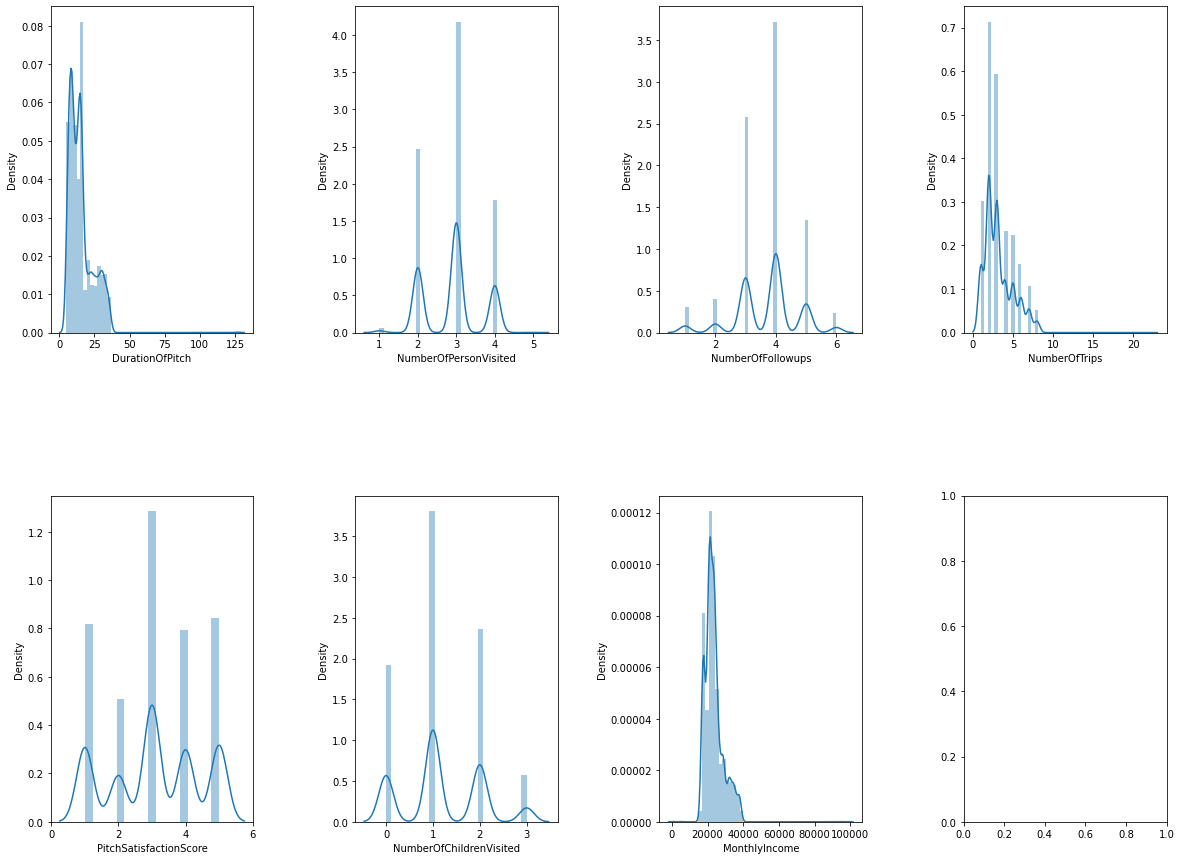

In [33]:
# Univariate analysis
    
num1 = num1[1:]
fig,axes = plt.subplots(2,4,figsize = (20,15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i,ax in zip(num1,axes.flatten()):
    sns.distplot(trsm_pckg1[i],ax=ax)

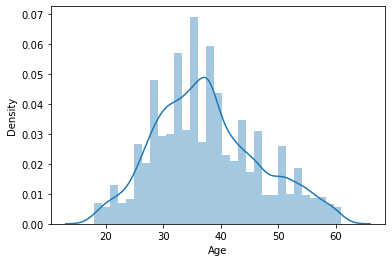

In [34]:
sns.distplot(trsm_pckg1['Age'])

**Outlier check**

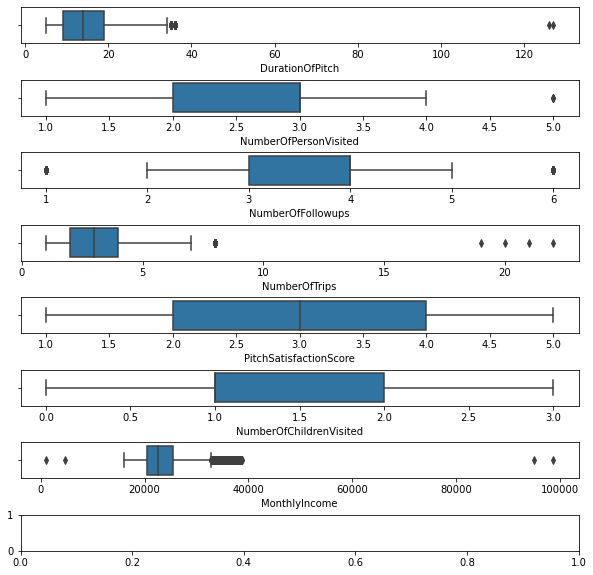

In [35]:
fig,axes = plt.subplots(8,1,figsize=(10,10))
plt.subplots_adjust(hspace=1)
for i,ax in zip(num1,axes.flatten()):
    sns.boxplot(trsm_pckg1[i],ax=ax)

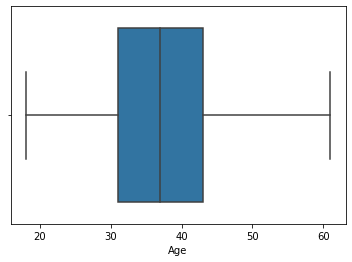

In [36]:
sns.boxplot(trsm_pckg1['Age'])

**Varaiable transformation**

Binning

In [38]:
trsm_pckg2 = trsm_pckg1.copy()

In [39]:
# Binning using the Quartiles - Duration of pitch
trsm_pckg2['DurationOfPitch_bins'] = pd.qcut(trsm_pckg2['DurationOfPitch'],q=4,labels=['Really Low','Low','Medium','High'])
trsm_pckg2['DurationOfPitch_bins'] = trsm_pckg2['DurationOfPitch_bins'].astype('object')
trsm_pckg2['DurationOfPitch_bins'].value_counts()

Really Low    1471
High          1199
Low           1120
Medium        1098
Name: DurationOfPitch_bins, dtype: int64

In [40]:
trsm_pckg2['NumberOfFollowups_bins'] = pd.qcut(trsm_pckg2['NumberOfFollowups'],q=4,labels = ['Low','Medium','High'],duplicates='drop')
trsm_pckg2['NumberOfFollowups_bins'] = trsm_pckg2['NumberOfFollowups_bins'].astype('object')
trsm_pckg2['NumberOfFollowups_bins'].value_counts()

Medium    2113
Low       1871
High       904
Name: NumberOfFollowups_bins, dtype: int64

In [41]:
# Binning using lambda function - Number of persons Visited
trsm_pckg2['NumberOfPersonVisited_bins'] = trsm_pckg2['NumberOfPersonVisited'].apply(lambda x : 
                                                                                       'One or Two' if x<3 else 'Three and above')
trsm_pckg2['NumberOfPersonVisited_bins'].value_counts()

Three and above    3431
One or Two         1457
Name: NumberOfPersonVisited_bins, dtype: int64

In [42]:
trsm_pckg2['NumberOfTrips_bins'] = pd.qcut(trsm_pckg2['NumberOfTrips'],q=4,labels = ['Low','Medium','High','Very High'])
trsm_pckg2['NumberOfTrips_bins'] = trsm_pckg2['NumberOfTrips_bins'].astype('object')
trsm_pckg2['NumberOfTrips_bins'].value_counts()

Low          2084
Medium       1219
Very High    1107
High          478
Name: NumberOfTrips_bins, dtype: int64

In [43]:
trsm_pckg2['PitchSatisfactionScore_bins'] = trsm_pckg2['PitchSatisfactionScore'].map({1 : 'Bad',2: 'OK',3: 'Good',4: 'Very Good',5: 'Excellent'})
trsm_pckg2['PitchSatisfactionScore_bins'].value_counts()

Good         1478
Excellent     970
Bad           942
Very Good     912
OK            586
Name: PitchSatisfactionScore_bins, dtype: int64

In [44]:
trsm_pckg2['NumberOfChildrenVisited_bins'] = trsm_pckg2['NumberOfChildrenVisited'].apply(lambda x: 'One' if x<2 else '2 or more')
trsm_pckg2['NumberOfChildrenVisited_bins'].value_counts()

One          3228
2 or more    1660
Name: NumberOfChildrenVisited_bins, dtype: int64

In [45]:
trsm_pckg2.drop(['DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups','NumberOfTrips','PitchSatisfactionScore',
                  'NumberOfChildrenVisited'],axis=1,inplace=True)

In [46]:
trsm_pckg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ProdTaken                     4888 non-null   object 
 1   Age                           4888 non-null   float64
 2   PreferredLoginDevice          4888 non-null   object 
 3   CityTier                      4888 non-null   object 
 4   Occupation                    4888 non-null   object 
 5   Gender                        4888 non-null   object 
 6   ProductPitched                4888 non-null   object 
 7   PreferredPropertyStar         4888 non-null   object 
 8   MaritalStatus                 4888 non-null   object 
 9   Passport                      4888 non-null   object 
 10  OwnCar                        4888 non-null   object 
 11  Designation                   4888 non-null   object 
 12  MonthlyIncome                 4888 non-null   float64
 13  Dur

In [47]:
numerical2 = list(trsm_pckg2.dtypes[trsm_pckg2.dtypes != 'object'].index)
categorical2 = list(trsm_pckg2.dtypes[trsm_pckg2.dtypes == 'object'].index)

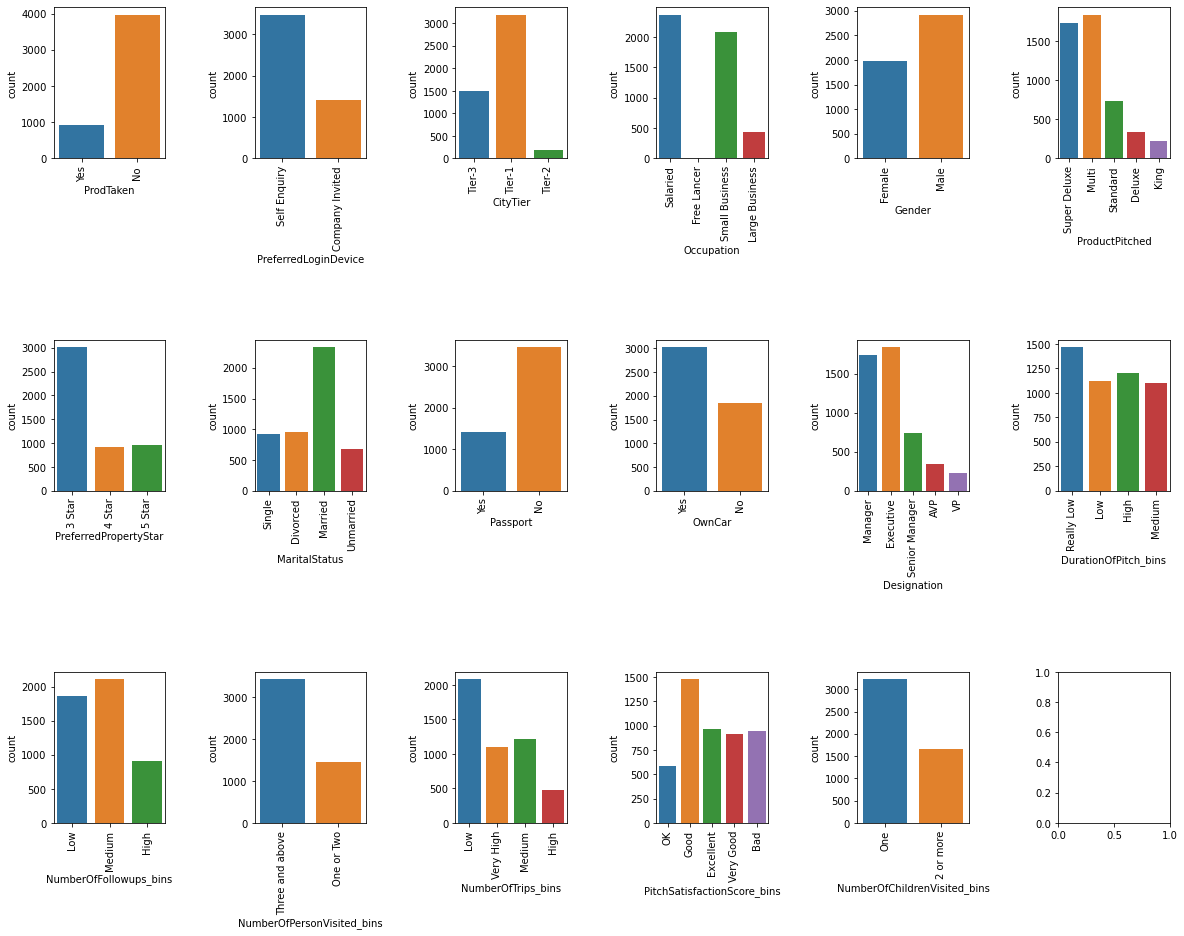

In [48]:
fig,axes = plt.subplots(3,6,figsize=(20,15))
plt.subplots_adjust(wspace=0.8,hspace=1.2)
for i,ax in zip(categorical2,axes.flatten()):
    sns.countplot(trsm_pckg2[i],ax=ax)
    ax.set_xticklabels(list(trsm_pckg2[i].unique()),rotation=90)

**Bivariate analysis**

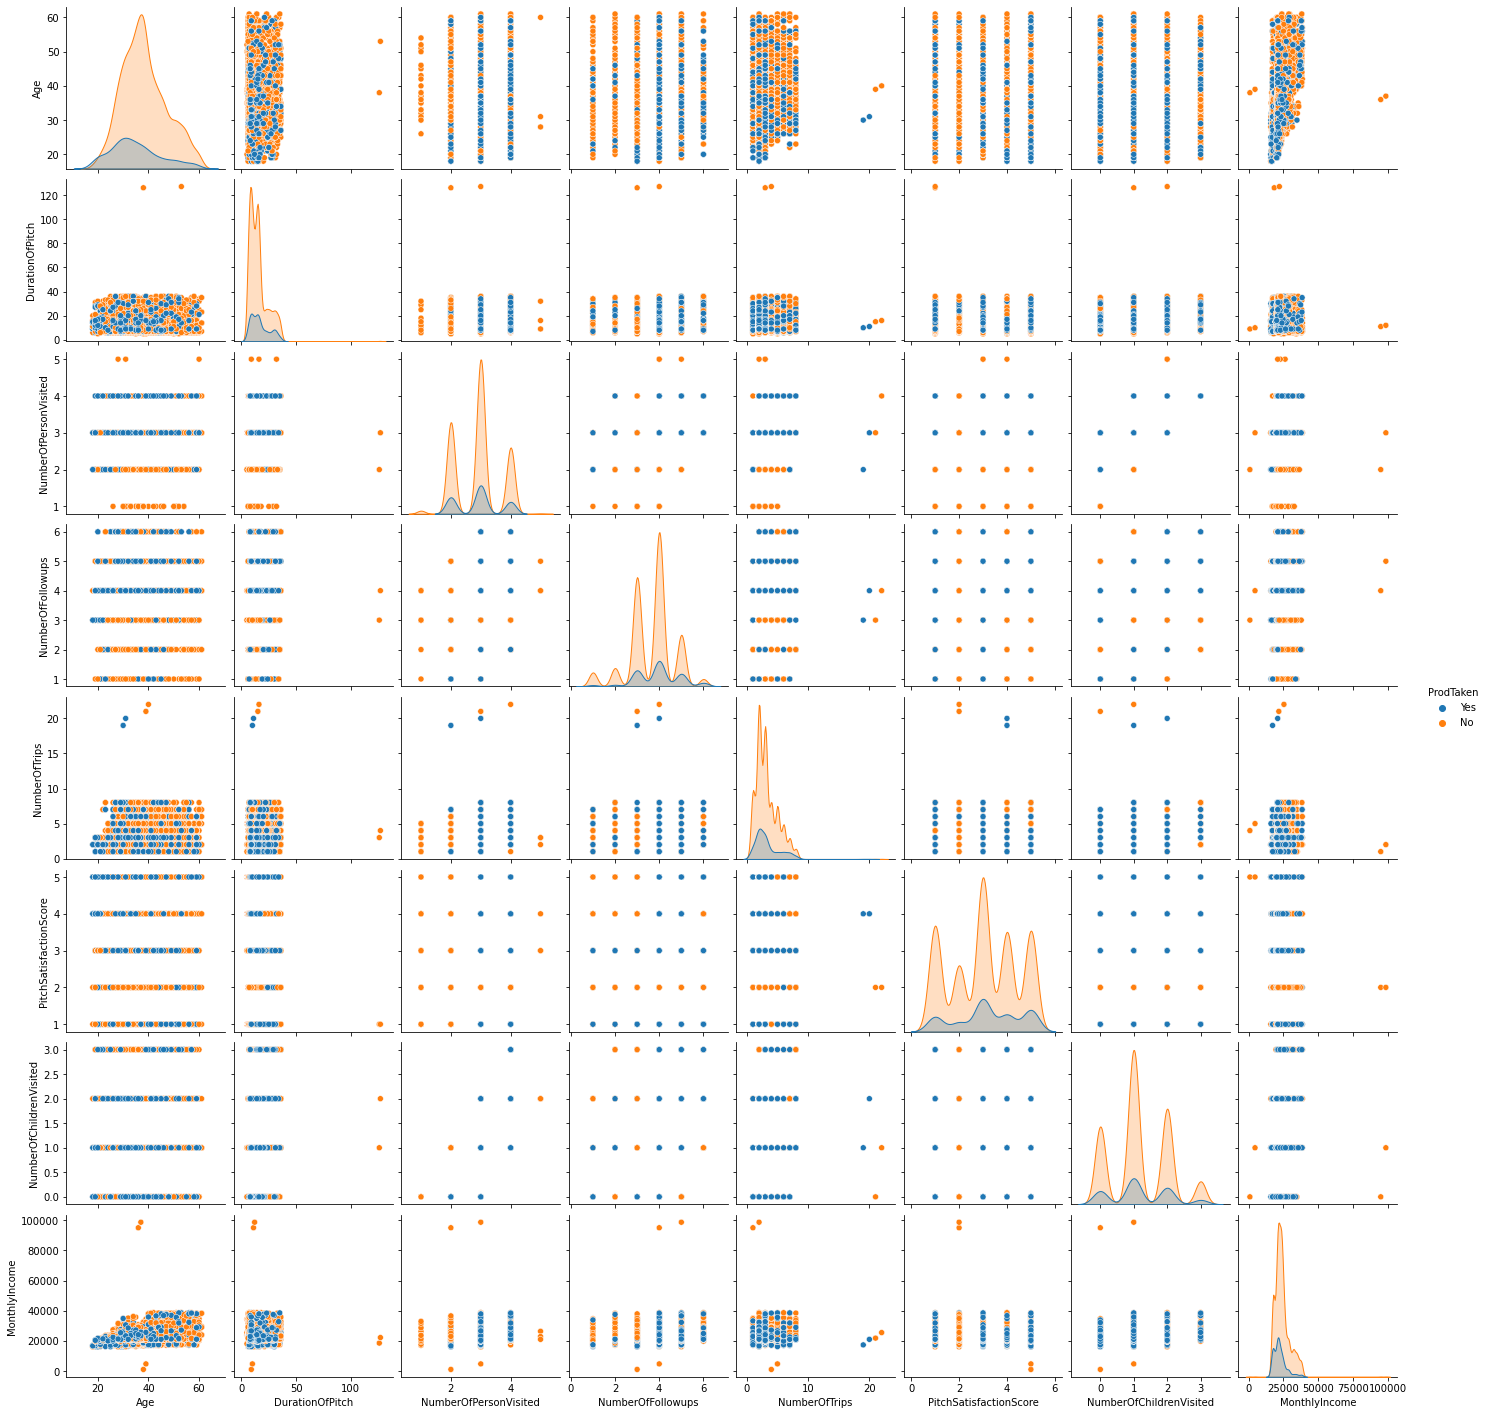

In [49]:
# Bivariate analysis

sns.pairplot(trsm_pckg1, hue = 'ProdTaken')

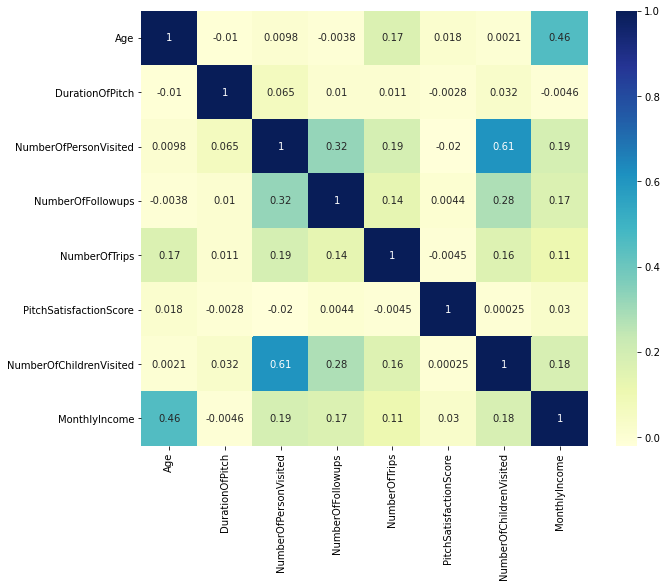

In [50]:
# Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(trsm_pckg1.corr(),annot=True, cmap = 'YlGnBu')
plt.show()

**Note**

Since most of the variables are class type variables, correlation can not be assesed. So correlation part is not included in report, as it is for reference only.

Text(0.5, 0.98, 'Product Taken')

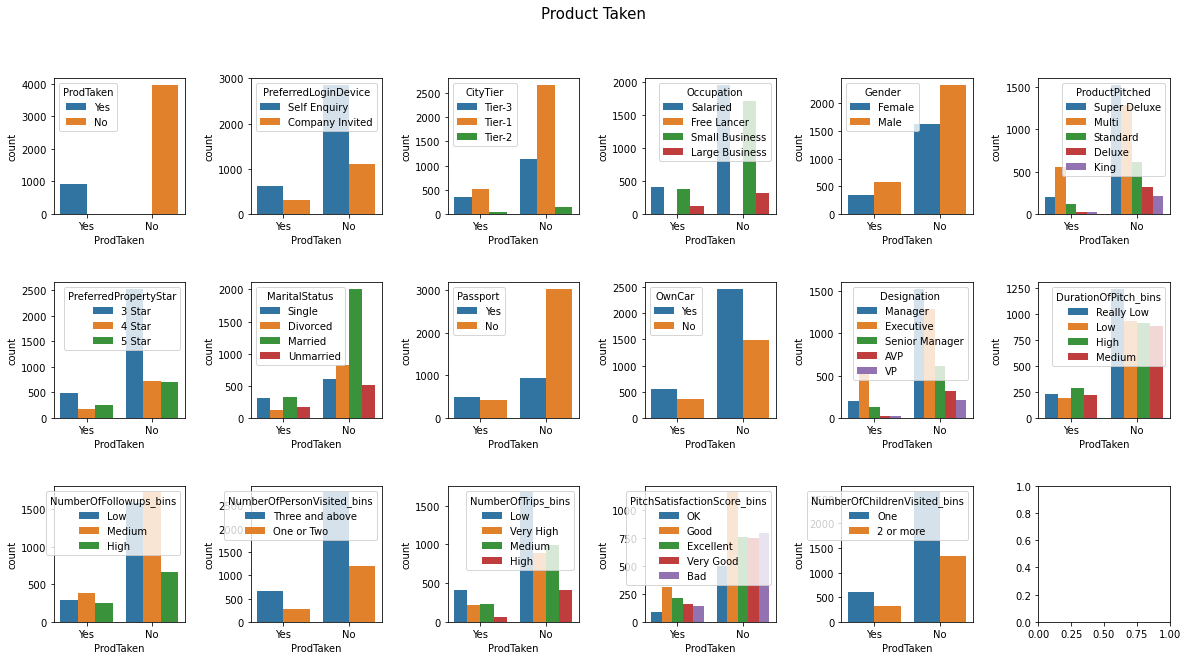

In [51]:
# Product taken across various categories 

fig,axes = plt.subplots(3,6,figsize = (20,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i,j in zip(categorical2,axes.flatten()):
    sns.countplot(x = 'ProdTaken',hue = i,data = trsm_pckg2,ax = j)
fig.suptitle('Product Taken',fontsize=15)

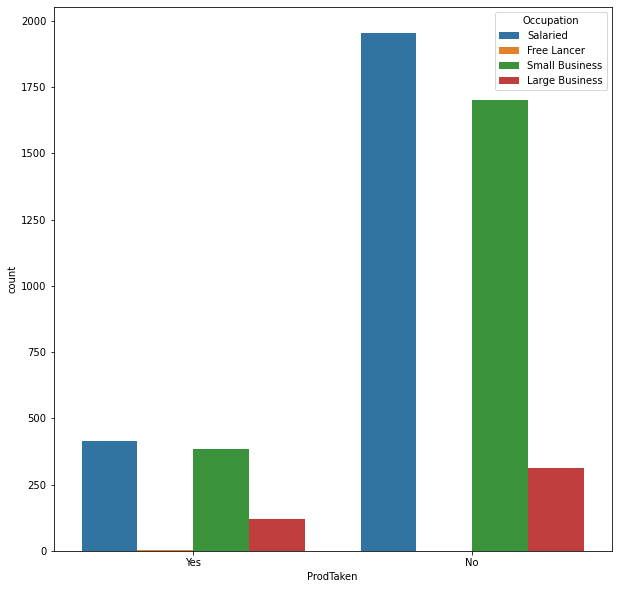

In [55]:
# Deep Exploration of occupation individually since its not much intuitive in the above graph

fig,axes = plt.subplots(figsize=(10,10))
sns.countplot(x = 'ProdTaken',data = trsm_pckg2,hue = 'Occupation')

And we see Freelancers have neglible plot so let's explore individually, and check if it gives us any insights

In [56]:
trsm_pckg2[trsm_pckg2['Occupation'] == 'Free Lancer']

,ProdTaken,Age,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,MonthlyIncome,DurationOfPitch_bins,NumberOfFollowups_bins,NumberOfPersonVisited_bins,NumberOfTrips_bins,PitchSatisfactionScore_bins,NumberOfChildrenVisited_bins
2,Yes,37.0,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,17090.0,Really Low,Medium,Three and above,Very High,Good,One
2446,Yes,38.0,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,20768.0,Really Low,High,Three and above,Very High,Good,One


Text(0.5, 0.98, 'Monthly Income')

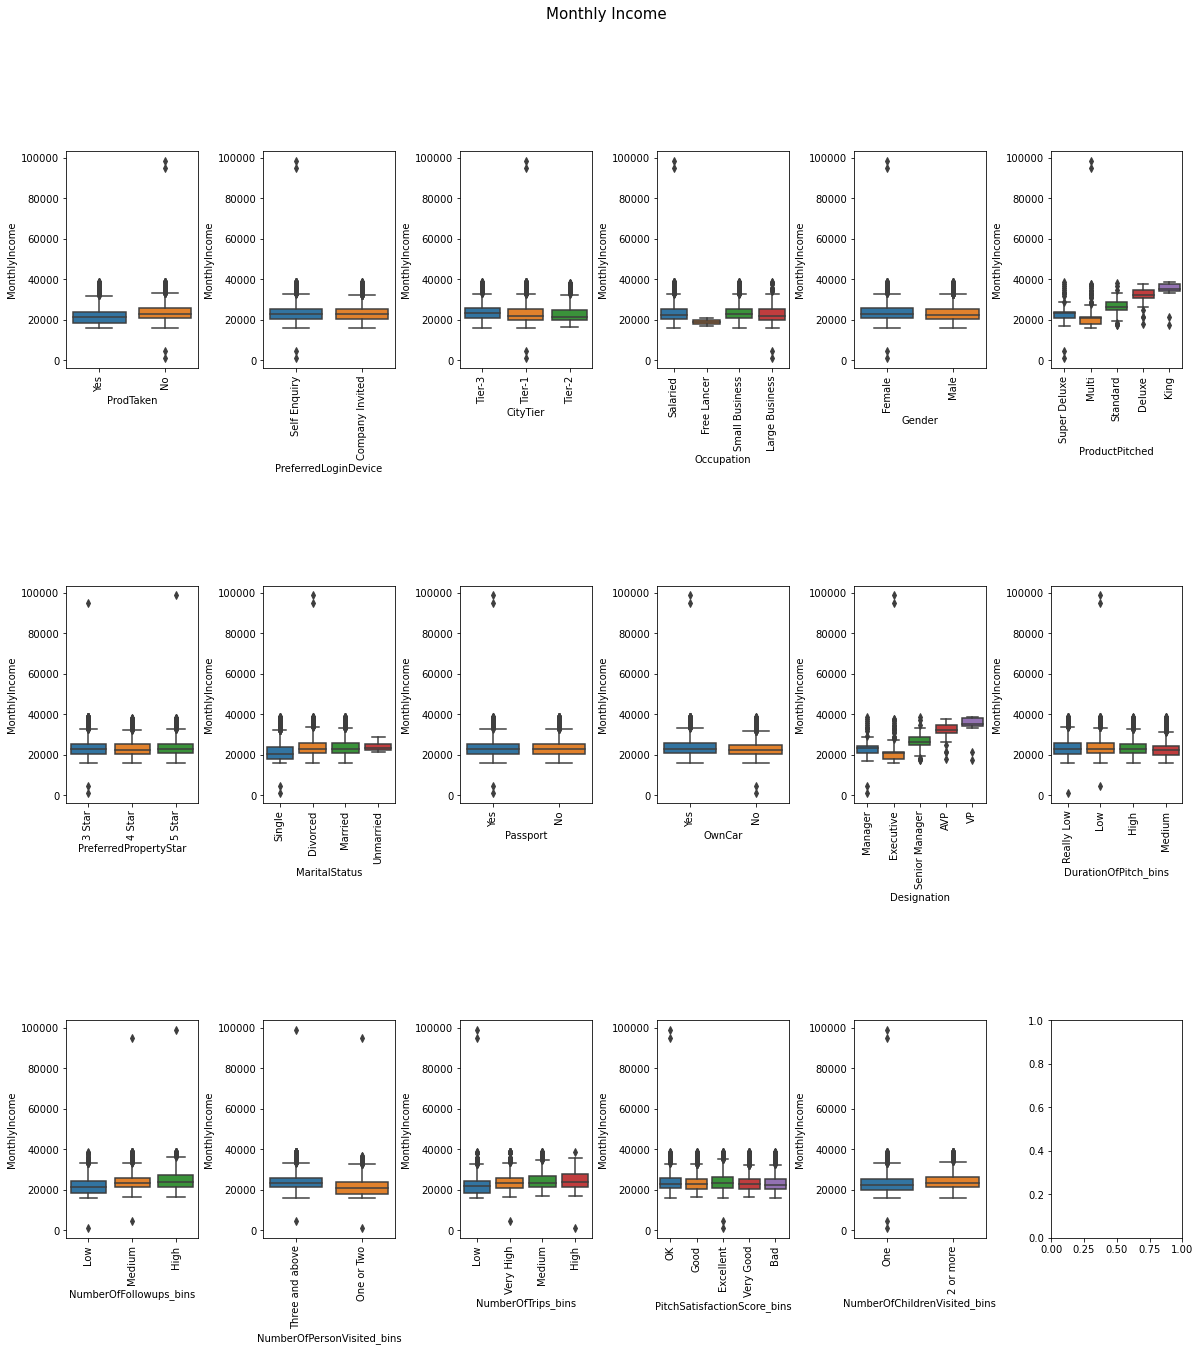

In [52]:
# Distribution of Monthly Income across the categorical and Binned variables
fig,axes = plt.subplots(3,6,figsize = (20,20))
plt.subplots_adjust(wspace=0.5,hspace=1)
for i,j in zip(categorical2,axes.flatten()):
    sns.boxplot(y = 'MonthlyIncome',x = i,data = trsm_pckg2,ax = j)
    j.set_xticklabels(trsm_pckg2[i].unique(),rotation = 90)
fig.suptitle('Monthly Income',fontsize=15)

Text(0.5, 0.98, 'Age')

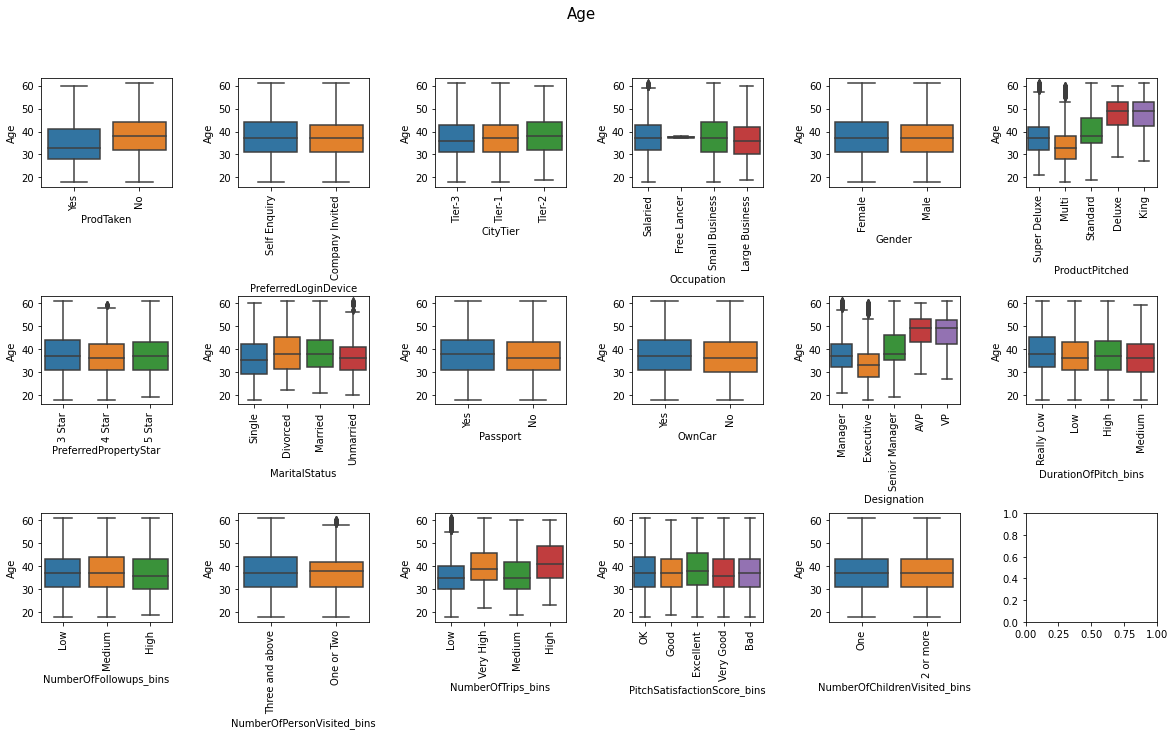

In [53]:
# Distribution of Age across the categorical and Binned variables
fig,axes = plt.subplots(3,6,figsize = (20,10))
plt.subplots_adjust(wspace=0.5,hspace=1)
for i,j in zip(categorical2,axes.flatten()):
    sns.boxplot(y = 'Age',x = i,data = trsm_pckg2,ax = j)
    j.set_xticklabels(trsm_pckg2[i].unique(),rotation = 90)
fig.suptitle('Age',fontsize=15)

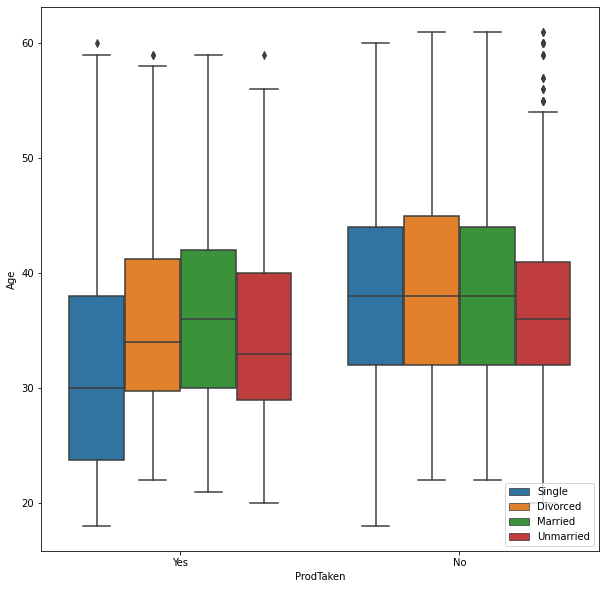

In [57]:
fig,axes = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'ProdTaken',y = 'Age',data = trsm_pckg2,hue = 'MaritalStatus')
axes.legend(loc='lower right')

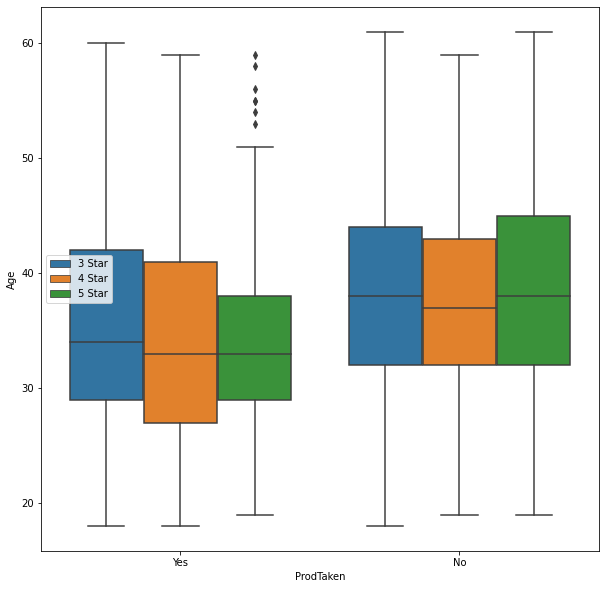

In [58]:
fig,axes = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'ProdTaken',y = 'Age',data = trsm_pckg2,hue = 'PreferredPropertyStar')
axes.legend(loc = 'best')

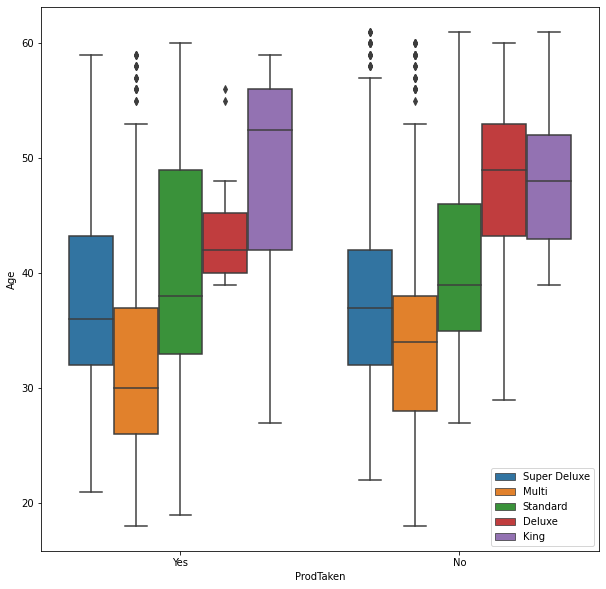

In [102]:
fig, axes = plt.subplots(figsize=(10,10))
sns.boxplot( x = 'ProdTaken', y = 'Age', data = trsm_pckg2, hue = 'ProductPitched')
axes.legend(loc='lower right')

**Cluster analysis**

In [87]:
trsm_pckg3 = trsm_pckg1.copy()
trsm_pckg3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4888 non-null   object 
 1   Age                      4888 non-null   float64
 2   PreferredLoginDevice     4888 non-null   object 
 3   CityTier                 4888 non-null   object 
 4   DurationOfPitch          4888 non-null   float64
 5   Occupation               4888 non-null   object 
 6   Gender                   4888 non-null   object 
 7   NumberOfPersonVisited    4888 non-null   int64  
 8   NumberOfFollowups        4888 non-null   float64
 9   ProductPitched           4888 non-null   object 
 10  PreferredPropertyStar    4888 non-null   object 
 11  MaritalStatus            4888 non-null   object 
 12  NumberOfTrips            4888 non-null   float64
 13  Passport                 4888 non-null   object 
 14  PitchSatisfactionScore  

In [88]:
trsm_pckg3['ProductPitched_codes'] = trsm_pckg3['ProductPitched'].map({'Multi':1,'Standard':2,'Deluxe':3,'Super Deluxe':4,'King':5})
trsm_pckg3.drop('ProductPitched',inplace=True,axis=1)
trsm_pckg3['PreferredPropertyStar_codes'] = trsm_pckg3['PreferredPropertyStar'].map({'3 Star':1,'4 Star':2,'5 Star':3})
trsm_pckg3.drop('PreferredPropertyStar',inplace=True,axis=1)
trsm_pckg3['Designation_codes'] = trsm_pckg3['Designation'].map({'Executive':1,'Manager':2,'Senior Manager':3,'AVP':4,'VP':5})
trsm_pckg3.drop('Designation',inplace=True,axis=1)

In [89]:
categorical3=list(trsm_pckg3.dtypes[trsm_pckg3.dtypes == object].index)
numerical3 = list(trsm_pckg3.dtypes[trsm_pckg3.dtypes != object].index) 
trsm_pckg3_cat = trsm_pckg3[categorical3]
trsm_pckg3_dummies = pd.get_dummies(trsm_pckg3_cat)
trsm_pckg3_dummified = pd.concat([trsm_pckg3[numerical3],trsm_pckg3_dummies],axis=1)

In [90]:
std_scaler = StandardScaler()
trsm_pckg3_dum_std = pd.DataFrame(std_scaler.fit_transform(trsm_pckg3_dummified),columns = trsm_pckg3_dummified.columns)
trsm_pckg3_dum_std.head()

,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,MonthlyIncome,ProductPitched_codes,PreferredPropertyStar_codes,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_No,Passport_Yes,OwnCar_No,OwnCar_Yes,Cluster_Cluster-1,Cluster_Cluster-2,Cluster_Cluster-3
0,0.369348,-1.140736,0.130966,-0.712434,-1.223399,-0.789477,-1.390153,-0.500322,1.032132,-0.725222,...,-0.958315,2.082365,-0.402678,-1.561221,1.561221,-0.782392,0.782392,-0.957530,2.087977,-0.70993
1,1.248679,-0.176628,0.130966,0.289401,-0.674727,-0.057226,0.956616,-0.664693,1.032132,0.529604,...,-0.958315,-0.480223,-0.402678,0.640524,-0.640524,-0.782392,0.782392,1.044354,-0.478932,-0.70993
2,-0.070317,-0.899709,0.130966,0.289401,2.068633,-0.057226,-1.390153,-1.243704,-1.092999,-0.725222,...,-0.958315,2.082365,-0.402678,-1.561221,1.561221,1.278132,-1.278132,-0.957530,2.087977,-0.70993
3,-0.509982,-0.779195,-1.248694,-0.712434,-0.674727,1.407276,-0.216769,-1.087714,-1.092999,-0.725222,...,-0.958315,-0.480223,-0.402678,-1.561221,1.561221,-0.782392,0.782392,-0.957530,-0.478932,1.40859
4,0.039600,-0.899709,-1.248694,-0.712434,-1.223399,1.407276,-1.390153,-0.981245,-1.092999,0.529604,...,-0.958315,-0.480223,-0.402678,0.640524,-0.640524,-0.782392,0.782392,1.044354,-0.478932,-0.70993


In [91]:
trsm_pckg3_dum_std.shape

(4888, 35)

Text(0.5, 1.0, 'Silhouette Score Plot')

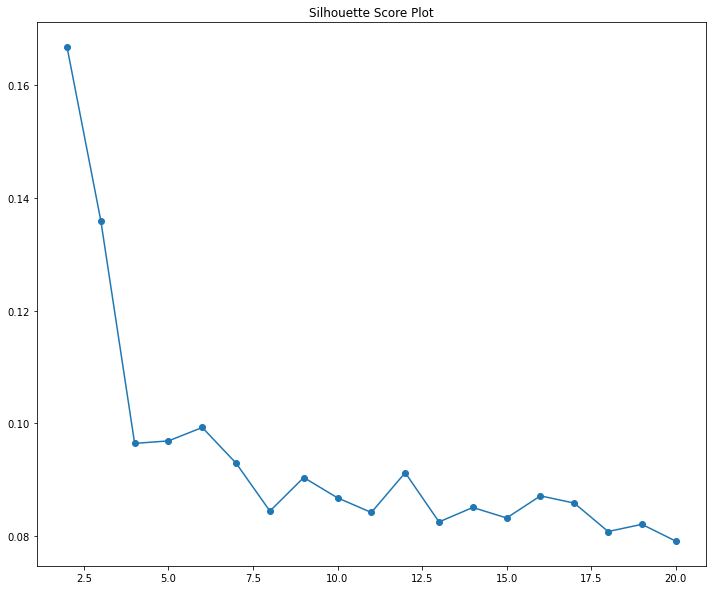

In [92]:
sil_score = []
for i in range(2,21):
    k_means = KMeans(n_clusters = i,random_state=42)
    k_means.fit(trsm_pckg3_dum_std)
    clus = k_means.labels_
    sil_score.append(silhouette_score(X=trsm_pckg3_dum_std,labels = clus))
fig,axes = plt.subplots(figsize=(12,10))
plt.plot(range(2,21),sil_score,marker='o')
axes.set_title('Silhouette Score Plot')

In [93]:
knn2 = KMeans(n_clusters=3)
knn2.fit(trsm_pckg3_dum_std)
trsm_pckg2['Cluster'] = knn2.labels_
trsm_pckg1['Cluster'] = knn2.labels_

In [94]:
trsm_pckg2['Cluster'].unique()

array([0, 2, 1])

In [95]:
trsm_pckg2['Cluster'] = trsm_pckg2['Cluster'].map({0:'Cluster-1',1:'Cluster-2',2:'Cluster-3'}) 
trsm_pckg1['Cluster'] = trsm_pckg1['Cluster'].map({0:'Cluster-1',1:'Cluster-2',2:'Cluster-3'})

In [96]:
trsm_pckg1.head()

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,Cluster
0,Yes,41.0,Self Enquiry,Tier-3,6.0,Salaried,Female,3,3.0,Super Deluxe,3 Star,Single,1.0,Yes,2,Yes,0.0,Manager,20993.0,Cluster-1
1,No,49.0,Company Invited,Tier-1,14.0,Salaried,Male,3,4.0,Super Deluxe,4 Star,Divorced,2.0,No,3,Yes,2.0,Manager,20130.0,Cluster-3
2,Yes,37.0,Self Enquiry,Tier-1,8.0,Free Lancer,Male,3,4.0,Multi,3 Star,Single,7.0,Yes,3,No,0.0,Executive,17090.0,Cluster-1
3,No,33.0,Company Invited,Tier-1,9.0,Salaried,Female,2,3.0,Multi,3 Star,Divorced,2.0,Yes,5,Yes,1.0,Executive,17909.0,Cluster-2
4,No,38.0,Self Enquiry,Tier-1,8.0,Small Business,Male,2,3.0,Multi,4 Star,Divorced,1.0,No,5,Yes,0.0,Executive,18468.0,Cluster-3


In [97]:
trsm_pckg2.head()

,ProdTaken,Age,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,MonthlyIncome,DurationOfPitch_bins,NumberOfFollowups_bins,NumberOfPersonVisited_bins,NumberOfTrips_bins,PitchSatisfactionScore_bins,NumberOfChildrenVisited_bins,Cluster
0,Yes,41.0,Self Enquiry,Tier-3,Salaried,Female,Super Deluxe,3 Star,Single,Yes,Yes,Manager,20993.0,Really Low,Low,Three and above,Low,OK,One,Cluster-1
1,No,49.0,Company Invited,Tier-1,Salaried,Male,Super Deluxe,4 Star,Divorced,No,Yes,Manager,20130.0,Low,Medium,Three and above,Low,Good,2 or more,Cluster-3
2,Yes,37.0,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,17090.0,Really Low,Medium,Three and above,Very High,Good,One,Cluster-1
3,No,33.0,Company Invited,Tier-1,Salaried,Female,Multi,3 Star,Divorced,Yes,Yes,Executive,17909.0,Really Low,Low,One or Two,Low,Excellent,One,Cluster-2
4,No,38.0,Self Enquiry,Tier-1,Small Business,Male,Multi,4 Star,Divorced,No,Yes,Executive,18468.0,Really Low,Low,One or Two,Low,Excellent,One,Cluster-3


In [98]:
trsm_pckg2[trsm_pckg2['Cluster']=='Cluster-1']

,ProdTaken,Age,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,MonthlyIncome,DurationOfPitch_bins,NumberOfFollowups_bins,NumberOfPersonVisited_bins,NumberOfTrips_bins,PitchSatisfactionScore_bins,NumberOfChildrenVisited_bins,Cluster
0,Yes,41.0,Self Enquiry,Tier-3,Salaried,Female,Super Deluxe,3 Star,Single,Yes,Yes,Manager,20993.0,Really Low,Low,Three and above,Low,OK,One,Cluster-1
2,Yes,37.0,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,17090.0,Really Low,Medium,Three and above,Very High,Good,One,Cluster-1
14,Yes,28.0,Self Enquiry,Tier-1,Salaried,Male,Multi,3 Star,Single,Yes,No,Executive,17028.0,High,Medium,One or Two,Very High,OK,One,Cluster-1
21,Yes,38.0,Self Enquiry,Tier-3,Salaried,Male,Super Deluxe,5 Star,Single,No,No,Manager,18407.0,Medium,Medium,One or Two,Low,OK,One,Cluster-1
24,Yes,34.0,Self Enquiry,Tier-1,Small Business,Male,Multi,5 Star,Single,No,Yes,Executive,17960.0,Low,Low,One or Two,Medium,OK,One,Cluster-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,Yes,49.0,Self Enquiry,Tier-3,Small Business,Male,Super Deluxe,4 Star,Unmarried,Yes,Yes,Manager,26576.0,Really Low,High,Three and above,Low,Bad,One,Cluster-1
4884,Yes,28.0,Company Invited,Tier-1,Salaried,Male,Multi,3 Star,Single,Yes,Yes,Executive,21212.0,High,High,Three and above,Medium,Good,2 or more,Cluster-1
4885,Yes,52.0,Self Enquiry,Tier-3,Salaried,Female,Standard,4 Star,Married,No,Yes,Senior Manager,31820.0,Medium,Medium,Three and above,Very High,Bad,2 or more,Cluster-1
4886,Yes,19.0,Self Enquiry,Tier-3,Small Business,Male,Multi,3 Star,Single,No,No,Executive,20289.0,Medium,Medium,Three and above,Medium,Excellent,2 or more,Cluster-1


In [99]:
trsm_pckg2[trsm_pckg2['Cluster']=='Cluster-2']

,ProdTaken,Age,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,MonthlyIncome,DurationOfPitch_bins,NumberOfFollowups_bins,NumberOfPersonVisited_bins,NumberOfTrips_bins,PitchSatisfactionScore_bins,NumberOfChildrenVisited_bins,Cluster
3,No,33.0,Company Invited,Tier-1,Salaried,Female,Multi,3 Star,Divorced,Yes,Yes,Executive,17909.000000,Really Low,Low,One or Two,Low,Excellent,One,Cluster-2
6,No,59.0,Self Enquiry,Tier-1,Small Business,Female,Multi,5 Star,Divorced,Yes,Yes,Executive,17670.000000,Really Low,Low,One or Two,Very High,OK,One,Cluster-2
11,No,38.0,Self Enquiry,Tier-1,Salaried,Female,Super Deluxe,3 Star,Single,Yes,No,Manager,23619.853491,High,Medium,One or Two,Low,Good,One,Cluster-2
15,No,29.0,Self Enquiry,Tier-1,Salaried,Female,Standard,5 Star,Married,No,Yes,Senior Manager,24980.000000,High,Low,One or Two,Low,Excellent,One,Cluster-2
18,No,53.0,Self Enquiry,Tier-3,Salaried,Female,Deluxe,3 Star,Divorced,No,Yes,AVP,30427.000000,Really Low,Medium,Three and above,Medium,Good,One,Cluster-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,No,55.0,Company Invited,Tier-1,Salaried,Female,Standard,3 Star,Married,No,No,Senior Manager,29180.000000,Really Low,Medium,Three and above,Low,Excellent,2 or more,Cluster-2
4805,No,45.0,Self Enquiry,Tier-1,Salaried,Female,Multi,3 Star,Married,No,Yes,Executive,20689.000000,Really Low,Low,Three and above,Medium,Very Good,2 or more,Cluster-2
4807,No,30.0,Self Enquiry,Tier-1,Salaried,Female,Multi,3 Star,Married,No,Yes,Executive,22438.000000,Really Low,Medium,Three and above,Medium,Bad,2 or more,Cluster-2
4810,No,32.0,Self Enquiry,Tier-1,Small Business,Female,Super Deluxe,5 Star,Unmarried,No,Yes,Manager,25490.000000,High,High,Three and above,Medium,Excellent,One,Cluster-2


In [100]:
trsm_pckg2[trsm_pckg2['Cluster']=='Cluster-3']

,ProdTaken,Age,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,MonthlyIncome,DurationOfPitch_bins,NumberOfFollowups_bins,NumberOfPersonVisited_bins,NumberOfTrips_bins,PitchSatisfactionScore_bins,NumberOfChildrenVisited_bins,Cluster
1,No,49.0,Company Invited,Tier-1,Salaried,Male,Super Deluxe,4 Star,Divorced,No,Yes,Manager,20130.0,Low,Medium,Three and above,Low,Good,2 or more,Cluster-3
4,No,38.0,Self Enquiry,Tier-1,Small Business,Male,Multi,4 Star,Divorced,No,Yes,Executive,18468.0,Really Low,Low,One or Two,Low,Excellent,One,Cluster-3
5,No,32.0,Company Invited,Tier-1,Salaried,Male,Multi,3 Star,Single,No,Yes,Executive,18068.0,Really Low,Low,Three and above,Low,Excellent,One,Cluster-3
7,No,30.0,Self Enquiry,Tier-1,Salaried,Male,Multi,3 Star,Married,No,No,Executive,17693.0,High,Low,Three and above,Low,OK,One,Cluster-3
8,No,38.0,Company Invited,Tier-1,Salaried,Male,Standard,3 Star,Unmarried,No,No,Senior Manager,24526.0,High,Medium,One or Two,Low,Good,One,Cluster-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4808,No,55.0,Self Enquiry,Tier-1,Salaried,Male,Deluxe,3 Star,Married,No,No,AVP,36457.0,Low,Medium,Three and above,Medium,Excellent,One,Cluster-3
4809,No,32.0,Self Enquiry,Tier-1,Small Business,Male,Super Deluxe,5 Star,Married,Yes,Yes,Manager,25511.0,Medium,Medium,Three and above,Medium,Bad,2 or more,Cluster-3
4812,No,44.0,Self Enquiry,Tier-1,Salaried,Male,King,3 Star,Married,No,Yes,VP,38418.0,Low,High,Three and above,Very High,Excellent,One,Cluster-3
4813,No,50.0,Self Enquiry,Tier-1,Small Business,Male,King,3 Star,Married,No,No,VP,37389.0,Low,High,Three and above,Medium,Good,2 or more,Cluster-3


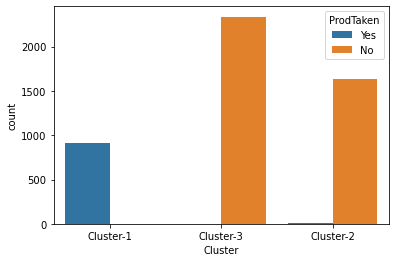

In [101]:
# Plot of clusters

sns.countplot(trsm_pckg2['Cluster'],hue=trsm_pckg2['ProdTaken'])

In [106]:
cat=list(trsm_pckg2.dtypes[trsm_pckg2.dtypes=='object'].index)
num=list(trsm_pckg2.dtypes[trsm_pckg2.dtypes!='object'].index)

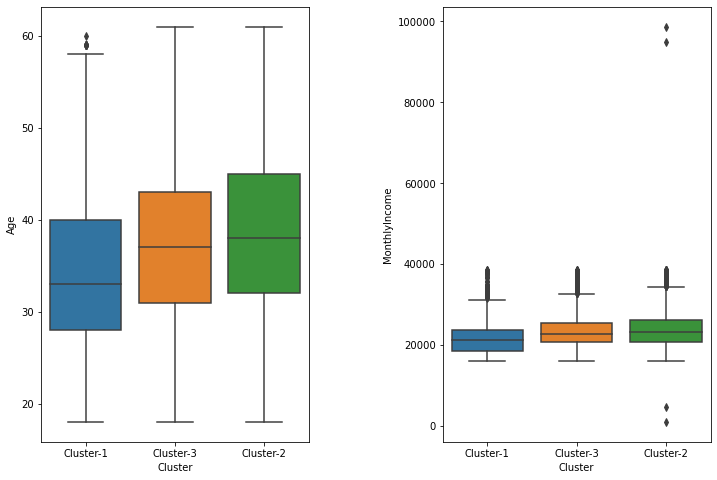

In [113]:
fig,axes = plt.subplots(1,2,figsize=(12,8))
plt.subplots_adjust(wspace = 0.5)
for i,j in zip(num,axes):
    sns.boxplot(x = 'Cluster', y = i, ax = j, data = trsm_pckg2)

**Pre-processing before modeling**

In [142]:
Trsm_pckg = pd.read_csv('Trsm_Pckg.csv')  #Here we are using the cleaned data where we saved it as csv file in the above EDA part
Trsm_pckg = Trsm_pckg.iloc[:,1:19]
Trsm_pckg.head()

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation
0,Yes,41.0,Self Enquiry,Tier-3,6.0,Salaried,Female,3,3.0,Super Deluxe,3 Star,Single,1.0,Yes,2,Yes,0.0,Manager
1,No,49.0,Company Invited,Tier-1,14.0,Salaried,Male,3,4.0,Super Deluxe,4 Star,Divorced,2.0,No,3,Yes,2.0,Manager
2,Yes,37.0,Self Enquiry,Tier-1,8.0,Free Lancer,Male,3,4.0,Multi,3 Star,Single,7.0,Yes,3,No,0.0,Executive
3,No,33.0,Company Invited,Tier-1,9.0,Salaried,Female,2,3.0,Multi,3 Star,Divorced,2.0,Yes,5,Yes,1.0,Executive
4,No,38.0,Self Enquiry,Tier-1,8.0,Small Business,Male,2,3.0,Multi,4 Star,Divorced,1.0,No,5,Yes,0.0,Executive


In [143]:
Trsm_pckg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4888 non-null   object 
 1   Age                      4888 non-null   float64
 2   PreferredLoginDevice     4888 non-null   object 
 3   CityTier                 4888 non-null   object 
 4   DurationOfPitch          4888 non-null   float64
 5   Occupation               4888 non-null   object 
 6   Gender                   4888 non-null   object 
 7   NumberOfPersonVisited    4888 non-null   int64  
 8   NumberOfFollowups        4888 non-null   float64
 9   ProductPitched           4888 non-null   object 
 10  PreferredPropertyStar    4888 non-null   object 
 11  MaritalStatus            4888 non-null   object 
 12  NumberOfTrips            4888 non-null   float64
 13  Passport                 4888 non-null   object 
 14  PitchSatisfactionScore  

In [144]:
# Ordinal_conversion

Trsm_pckg['ProductPitched_codes'] = Trsm_pckg['ProductPitched'].map({'Multi':1,'Standard':2,'Deluxe':3,'Super Deluxe':4,'King':5})
Trsm_pckg.drop('ProductPitched',inplace=True,axis=1)
Trsm_pckg['PreferredPropertyStar_codes'] = Trsm_pckg['PreferredPropertyStar'].map({'3 Star':1,'4 Star':2,'5 Star':3})
Trsm_pckg.drop('PreferredPropertyStar',inplace=True,axis=1)
Trsm_pckg['Designation_codes'] = Trsm_pckg['Designation'].map({'Executive':1,'Manager':2,'Senior Manager':3,'AVP':4,'VP':5})
Trsm_pckg.drop('Designation',inplace=True,axis=1)

In [145]:
# Encoding 

categorical = list(Trsm_pckg.dtypes[Trsm_pckg.dtypes == object].index)
numerical = list(Trsm_pckg.dtypes[Trsm_pckg.dtypes != object].index)
Trsm_pckg_cat = Trsm_pckg[categorical]
Trsm_pckg_dummies = pd.get_dummies(Trsm_pckg_cat,drop_first=True)
Trsm_pckg_dummified = pd.concat([Trsm_pckg[numerical],Trsm_pckg_dummies],axis=1)
Trsm_pckg_dummified.head()

,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,ProductPitched_codes,PreferredPropertyStar_codes,Designation_codes,...,CityTier_Tier-3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_Yes,OwnCar_Yes
0,41.0,6.0,3,3.0,1.0,2,0.0,4,1,2,...,1,0,1,0,0,0,1,0,1,1
1,49.0,14.0,3,4.0,2.0,3,2.0,4,2,2,...,0,0,1,0,1,0,0,0,0,1
2,37.0,8.0,3,4.0,7.0,3,0.0,1,1,1,...,0,0,0,0,1,0,1,0,1,0
3,33.0,9.0,2,3.0,2.0,5,1.0,1,1,1,...,0,0,1,0,0,0,0,0,1,1
4,38.0,8.0,2,3.0,1.0,5,0.0,1,2,1,...,0,0,0,1,1,0,0,0,0,1


In [146]:
print(categorical)

['ProdTaken', 'PreferredLoginDevice', 'CityTier', 'Occupation', 'Gender', 'MaritalStatus', 'Passport', 'OwnCar']


In [147]:
print(numerical)

['Age', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisited', 'ProductPitched_codes', 'PreferredPropertyStar_codes', 'Designation_codes']


**Outlier treatment**

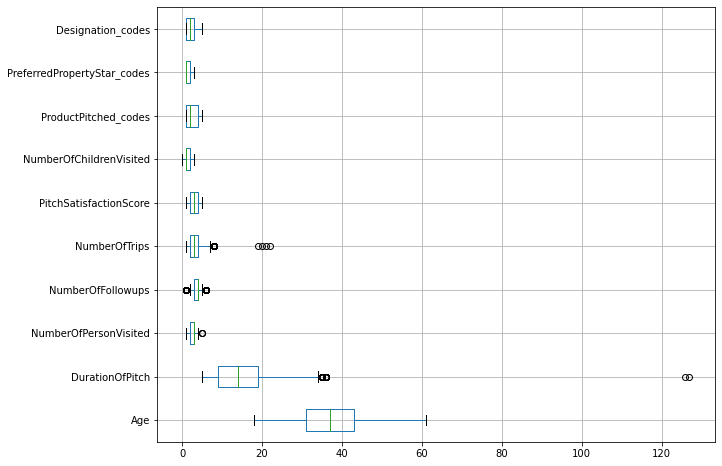

In [148]:
plt.figure(figsize=(10,8))
Trsm_pckg[numerical].boxplot(vert=0)
plt.show()

In [149]:
Q1 = Trsm_pckg.quantile(0.25) 
Q3 = Trsm_pckg.quantile(0.75) 
IQR = Q3 - Q1       
lower_range= Q1-(1.5 * IQR) 
upper_range= Q3+(1.5 * IQR)

In [150]:
# Outlier treatment

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [151]:
lecn,uecn=remove_outlier(Trsm_pckg["NumberOfTrips"])
Trsm_pckg["NumberOfTrips"]=np.where(Trsm_pckg["NumberOfTrips"]>uecn,uecn,Trsm_pckg["NumberOfTrips"])
Trsm_pckg["NumberOfTrips"]=np.where(Trsm_pckg["NumberOfTrips"]<lecn,lecn,Trsm_pckg["NumberOfTrips"])

lech,uech=remove_outlier(Trsm_pckg["NumberOfFollowups"])
Trsm_pckg["NumberOfFollowups"]=np.where(Trsm_pckg["NumberOfFollowups"]>uech,uech,Trsm_pckg["NumberOfFollowups"])
Trsm_pckg["NumberOfFollowups"]=np.where(Trsm_pckg["NumberOfFollowups"]<lech,lech,Trsm_pckg["NumberOfFollowups"])

lb,ub=remove_outlier(Trsm_pckg["NumberOfPersonVisited"])
Trsm_pckg["NumberOfPersonVisited"]=np.where(Trsm_pckg["NumberOfPersonVisited"]>ub,ub,Trsm_pckg["NumberOfPersonVisited"])
Trsm_pckg["NumberOfPersonVisited"]=np.where(Trsm_pckg["NumberOfPersonVisited"]<lb,lb,Trsm_pckg["NumberOfPersonVisited"])

lh,uh=remove_outlier(Trsm_pckg["DurationOfPitch"])
Trsm_pckg["DurationOfPitch"]=np.where(Trsm_pckg["DurationOfPitch"]>uh,uh,Trsm_pckg["DurationOfPitch"])
Trsm_pckg["DurationOfPitch"]=np.where(Trsm_pckg["DurationOfPitch"]<lh,lh,Trsm_pckg["DurationOfPitch"])

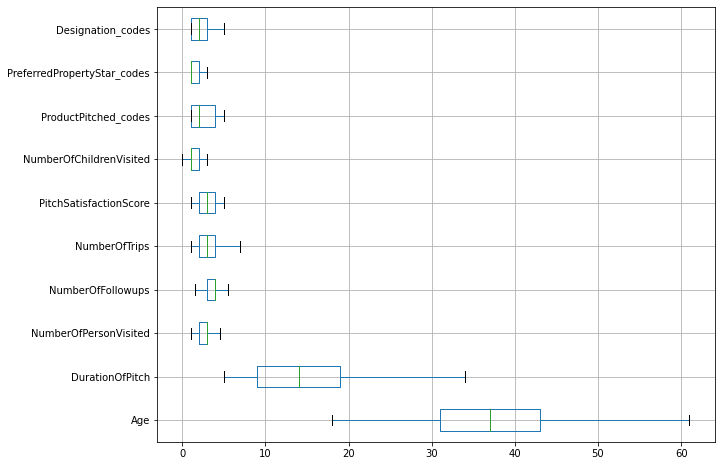

In [152]:
plt.figure(figsize=(10,8))
Trsm_pckg[numerical].boxplot(vert=0)
plt.show()

In [153]:
Trsm_pckg_dummified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4888 non-null   float64
 1   DurationOfPitch                    4888 non-null   float64
 2   NumberOfPersonVisited              4888 non-null   int64  
 3   NumberOfFollowups                  4888 non-null   float64
 4   NumberOfTrips                      4888 non-null   float64
 5   PitchSatisfactionScore             4888 non-null   int64  
 6   NumberOfChildrenVisited            4888 non-null   float64
 7   ProductPitched_codes               4888 non-null   int64  
 8   PreferredPropertyStar_codes        4888 non-null   int64  
 9   Designation_codes                  4888 non-null   int64  
 10  ProdTaken_Yes                      4888 non-null   uint8  
 11  PreferredLoginDevice_Self Enquiry  4888 non-null   uint8

# 4. Model building

In [154]:
Trsm_pckg.ProdTaken.value_counts(normalize = True)*100

No     81.178396
Yes    18.821604
Name: ProdTaken, dtype: float64

In [155]:
# Dividing the dataset into predictor and target variables

X = Trsm_pckg_dummified.loc[:,Trsm_pckg_dummified.columns != 'ProdTaken_Yes']
Y = Trsm_pckg_dummified.loc[:,Trsm_pckg_dummified.columns == 'ProdTaken_Yes']

In [156]:
# Splitting the data into train and test sets

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [157]:
# Scaling

std_scaler = StandardScaler()
scaled = std_scaler.fit_transform(X_train)
scaled

array([[ 1.69900276, 13.30657703,  0.13343265, ..., -0.40692473,
        -0.64087569,  0.76406564],
       [ 0.15053391, -0.77581203,  0.13343265, ...,  2.45745695,
         1.56036501, -1.30878808],
       [-0.5130956 , -0.77581203, -1.23735746, ..., -0.40692473,
         1.56036501,  0.76406564],
       ...,
       [-0.95551527, -1.13383887, -1.23735746, ..., -0.40692473,
        -0.64087569, -1.30878808],
       [-0.07067593,  0.29826849,  1.50422276, ...,  2.45745695,
        -0.64087569,  0.76406564],
       [ 0.59295358,  0.77563761,  0.13343265, ..., -0.40692473,
         1.56036501, -1.30878808]])

In [158]:
std_scaler = StandardScaler()
scaled = std_scaler.fit_transform(X_test)
scaled

array([[-1.15309731, -1.03450189,  1.52620774, ..., -0.3926949 ,
        -0.63970454,  0.82603841],
       [ 0.25557086, -0.29414205, -1.27597844, ..., -0.3926949 ,
        -0.63970454,  0.82603841],
       [-0.93637913, -0.04735544,  1.52620774, ..., -0.3926949 ,
        -0.63970454, -1.21059746],
       ...,
       [ 1.44752085, -1.03450189,  1.52620774, ..., -0.3926949 ,
        -0.63970454,  0.82603841],
       [ 0.47228904,  0.19943117,  1.52620774, ..., -0.3926949 ,
        -0.63970454,  0.82603841],
       [-0.50294277, -0.78771528,  0.12511465, ..., -0.3926949 ,
         1.56322166, -1.21059746]])

In [159]:
# Statsmodel implementation for Quantification & interpretation of significant variables and their probabilities

logit_mod = sm.Logit(Y_train, X_train)
result = logit_mod.fit()
coef_summary = pd.DataFrame(result.params, columns=['Coef'])
coef_summary

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


,Coef
Age,-0.014262
DurationOfPitch,0.029645
NumberOfPersonVisited,-0.079720
NumberOfFollowups,0.396470
NumberOfTrips,0.032945
PitchSatisfactionScore,0.132432
NumberOfChildrenVisited,-0.063709
ProductPitched_codes,-0.330182
PreferredPropertyStar_codes,0.408890
Designation_codes,-0.302246


In [160]:
# Interpreting the Coefficients and their probabilities

coef_summary['Odds'] = np.exp(coef_summary['Coef'])
coef_summary['prob'] = (coef_summary['Odds'])/(coef_summary['Odds']+1)
coef_summary

,Coef,Odds,prob
Age,-0.014262,0.985839,0.496434
DurationOfPitch,0.029645,1.030089,0.507411
NumberOfPersonVisited,-0.079720,0.923375,0.480080
NumberOfFollowups,0.396470,1.486568,0.597839
NumberOfTrips,0.032945,1.033494,0.508235
PitchSatisfactionScore,0.132432,1.141602,0.533060
NumberOfChildrenVisited,-0.063709,0.938278,0.484078
ProductPitched_codes,-0.330182,0.718793,0.418196
PreferredPropertyStar_codes,0.408890,1.505146,0.600822
Designation_codes,-0.302246,0.739156,0.425009


**Logistic Regression**

In [161]:
LR_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
LR_model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   28.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [162]:
Ytrain_predict = LR_model.predict(X_train)
model_score = LR_model.score(X_train, Y_train)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_train, Ytrain_predict))
print('')
print(metrics.classification_report(Y_train, Ytrain_predict))

0.848289973691903

[[2712   85]
 [ 434  190]]

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2797
           1       0.69      0.30      0.42       624

    accuracy                           0.85      3421
   macro avg       0.78      0.64      0.67      3421
weighted avg       0.83      0.85      0.82      3421



Train AUC: 0.814


<Figure size 720x576 with 0 Axes>

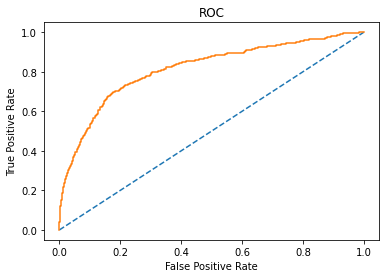

<Figure size 720x576 with 0 Axes>

In [163]:
# predict probabilities
probs = LR_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.figure(figsize=(10,8))

In [164]:
Ytest_predict = LR_model.predict(X_test)
model_score = LR_model.score(X_test, Y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_test, Ytest_predict))
print('')
print(metrics.classification_report(Y_test, Ytest_predict))

0.8302658486707567

[[1141   30]
 [ 219   77]]

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1171
           1       0.72      0.26      0.38       296

    accuracy                           0.83      1467
   macro avg       0.78      0.62      0.64      1467
weighted avg       0.81      0.83      0.80      1467



Test AUC: 0.814


Text(0.5, 1.0, 'ROC')

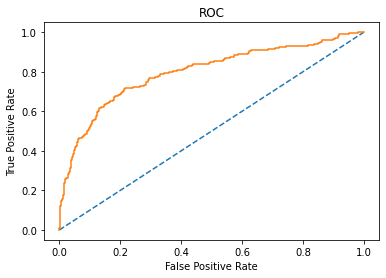

In [165]:
# predict probabilities
probs = LR_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

**Linear descriminent analysis**

In [166]:
clf = LinearDiscriminantAnalysis()
LDA_model = clf.fit(X_train,Y_train)

In [167]:
Ytrain_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, Y_train)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_train, Ytrain_predict))
print('')
print(metrics.classification_report(Y_train, Ytrain_predict))

0.8447822274188833

[[2700   97]
 [ 434  190]]

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2797
           1       0.66      0.30      0.42       624

    accuracy                           0.84      3421
   macro avg       0.76      0.63      0.66      3421
weighted avg       0.83      0.84      0.82      3421



Train AUC: 0.810


Text(0.5, 1.0, 'ROC')

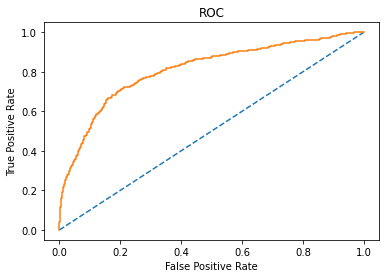

In [168]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [169]:
Ytest_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, Y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_test, Ytest_predict))
print('')
print(metrics.classification_report(Y_test, Ytest_predict))

0.8289025221540559

[[1134   37]
 [ 214   82]]

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1171
           1       0.69      0.28      0.40       296

    accuracy                           0.83      1467
   macro avg       0.77      0.62      0.65      1467
weighted avg       0.81      0.83      0.80      1467



Test AUC: 0.810


Text(0.5, 1.0, 'ROC')

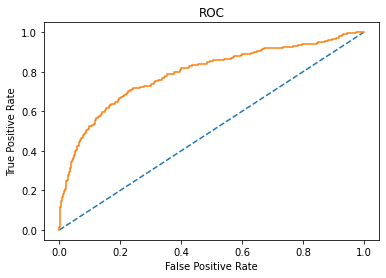

In [170]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

**KNN model**

In [171]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [172]:
## Performance Matrix on train data set
Y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, Y_train)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print('')
print(metrics.classification_report(Y_train, Y_train_predict))

0.9196141479099679

[[2759   38]
 [ 237  387]]

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2797
           1       0.91      0.62      0.74       624

    accuracy                           0.92      3421
   macro avg       0.92      0.80      0.85      3421
weighted avg       0.92      0.92      0.91      3421



Train AUC: 0.967


Text(0.5, 1.0, 'ROC')

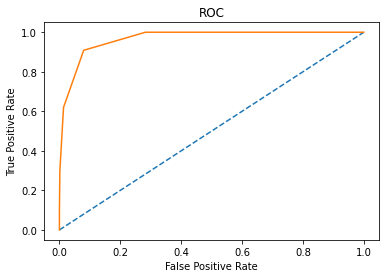

In [173]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [174]:
## Performance Matrix on test data set
Y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, Y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print('')
print(metrics.classification_report(Y_test, Y_test_predict))

0.8500340831629175

[[1138   33]
 [ 187  109]]

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1171
           1       0.77      0.37      0.50       296

    accuracy                           0.85      1467
   macro avg       0.81      0.67      0.70      1467
weighted avg       0.84      0.85      0.83      1467



Test AUC: 0.967


Text(0.5, 1.0, 'ROC')

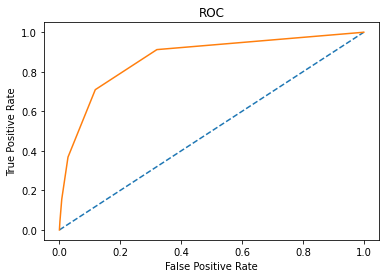

In [175]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

**Naive Baye's model**

In [176]:
NB_model = GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [177]:
Y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, Y_train)                      
print(model_score)
print('')
print(metrics.confusion_matrix(Y_train, Y_train_predict))  
print('')
print(metrics.classification_report(Y_train, Y_train_predict))

0.8251973107278574

[[2544  253]
 [ 345  279]]

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2797
           1       0.52      0.45      0.48       624

    accuracy                           0.83      3421
   macro avg       0.70      0.68      0.69      3421
weighted avg       0.82      0.83      0.82      3421



Train AUC: 0.784


Text(0.5, 1.0, 'ROC')

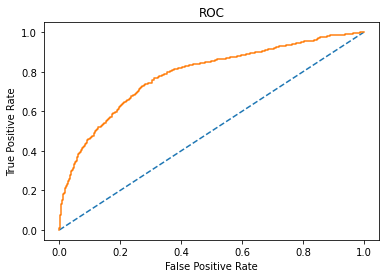

In [178]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [179]:
## Performance Matrix on test data set
Y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, Y_test)                    
print(model_score)
print('')
print(metrics.confusion_matrix(Y_test, Y_test_predict)) 
print('')
print(metrics.classification_report(Y_test, Y_test_predict)) 

0.8234492160872529

[[1082   89]
 [ 170  126]]

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1171
           1       0.59      0.43      0.49       296

    accuracy                           0.82      1467
   macro avg       0.73      0.67      0.69      1467
weighted avg       0.81      0.82      0.81      1467



Test AUC: 0.784


Text(0.5, 1.0, 'ROC')

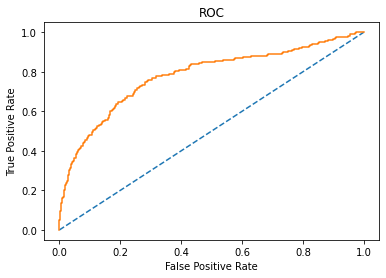

In [180]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

**Ensemble modelling**

**Adaptive boosting**

In [181]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [182]:
## Performance Matrix on train data set
Y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, Y_train)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print('')
print(metrics.classification_report(Y_train, Y_train_predict))

0.8515054077755042

[[2700   97]
 [ 411  213]]

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2797
           1       0.69      0.34      0.46       624

    accuracy                           0.85      3421
   macro avg       0.78      0.65      0.69      3421
weighted avg       0.83      0.85      0.83      3421



Train AUC: 0.841


Text(0.5, 1.0, 'ROC')

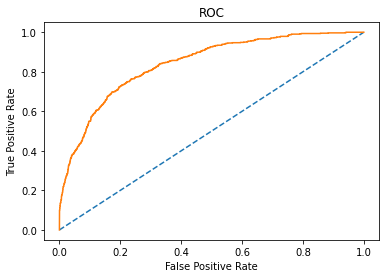

In [183]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [184]:
## Performance Matrix on test data set
Y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, Y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print('')
print(metrics.classification_report(Y_test, Y_test_predict))

0.8248125426039536

[[1129   42]
 [ 215   81]]

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1171
           1       0.66      0.27      0.39       296

    accuracy                           0.82      1467
   macro avg       0.75      0.62      0.64      1467
weighted avg       0.80      0.82      0.79      1467



Test AUC: 0.813


Text(0.5, 1.0, 'ROC')

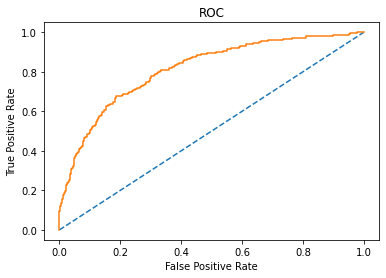

In [185]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

**Gradient boosting**

In [186]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, Y_train)

In [187]:
## Performance Matrix on train data set
Y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, Y_train)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print('')
print(metrics.classification_report(Y_train, Y_train_predict))

0.8854136217480268

[[2736   61]
 [ 331  293]]

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2797
           1       0.83      0.47      0.60       624

    accuracy                           0.89      3421
   macro avg       0.86      0.72      0.77      3421
weighted avg       0.88      0.89      0.87      3421



Train AUC: 0.909


Text(0.5, 1.0, 'ROC')

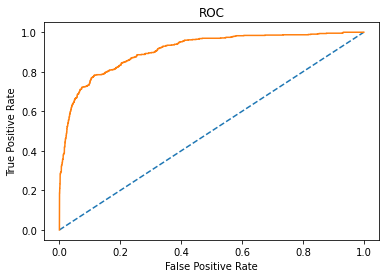

In [188]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [189]:
## Performance Matrix on test data set
Y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, Y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print('')
print(metrics.classification_report(Y_test, Y_test_predict))

0.8438991138377642

[[1145   26]
 [ 203   93]]

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1171
           1       0.78      0.31      0.45       296

    accuracy                           0.84      1467
   macro avg       0.82      0.65      0.68      1467
weighted avg       0.84      0.84      0.82      1467



Test AUC: 0.909


Text(0.5, 1.0, 'ROC')

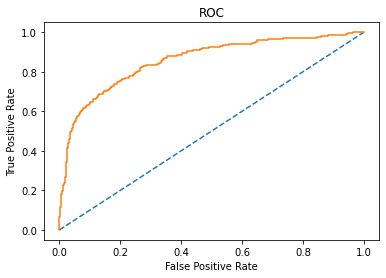

In [190]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

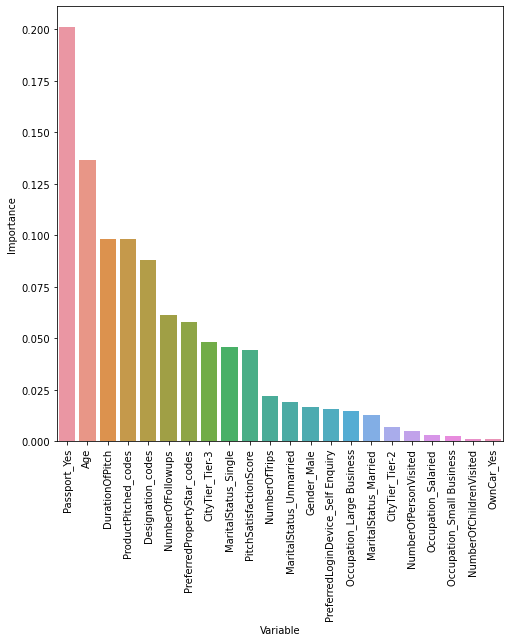

In [191]:
# Looking at Feature importances
importance = pd.DataFrame(gbcl.feature_importances_,columns=['Importance'])
importance['Variable'] = X_train.columns
importance=importance[['Variable','Importance']]
sorted_idx = gbcl.feature_importances_.argsort()[::-1]
fig,axes = plt.subplots(figsize=(8,8))
sns.barplot(x=importance['Variable'][sorted_idx],y='Importance',data = importance,ci=0)
axes.set_xticklabels(labels = importance['Variable'][sorted_idx],rotation=90)
plt.show()

**Bagging**

In [192]:
RF =RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=RF,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [197]:
## Performance Matrix on train data set
Y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, Y_train)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print('')
print(metrics.classification_report(Y_train, Y_train_predict))

0.9900613855597779

[[2797    0]
 [  34  590]]

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2797
           1       1.00      0.95      0.97       624

    accuracy                           0.99      3421
   macro avg       0.99      0.97      0.98      3421
weighted avg       0.99      0.99      0.99      3421



Train AUC: 1.000


Text(0.5, 1.0, 'ROC')

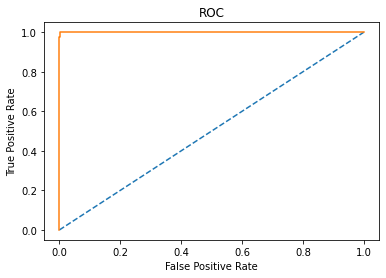

In [198]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [199]:
## Performance Matrix on test data set
Y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, Y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print('')
print(metrics.classification_report(Y_test, Y_test_predict))

0.8779822767552828

[[1163    8]
 [ 171  125]]

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1171
           1       0.94      0.42      0.58       296

    accuracy                           0.88      1467
   macro avg       0.91      0.71      0.76      1467
weighted avg       0.89      0.88      0.86      1467



Test AUC: 1.000


Text(0.5, 1.0, 'ROC')

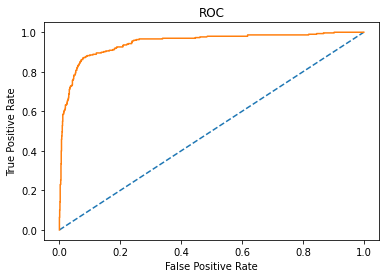

In [200]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

**SMOTE**

In [201]:
sm = SMOTE(random_state=1)
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train)

In [202]:
Y_train_res['ProdTaken_Yes'].value_counts(normalize = True)*100

1    50.0
0    50.0
Name: ProdTaken_Yes, dtype: float64

**KNN with SMOTE**

In [203]:
KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,Y_train_res)

KNeighborsClassifier()

In [204]:
## Performance Matrix on train data set
Y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, Y_train_res)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_train_res, Y_train_predict))
print('')
print(metrics.classification_report(Y_train_res, Y_train_predict))

0.9429746156596354

[[2485  312]
 [   7 2790]]

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2797
           1       0.90      1.00      0.95      2797

    accuracy                           0.94      5594
   macro avg       0.95      0.94      0.94      5594
weighted avg       0.95      0.94      0.94      5594



Train AUC: 0.995


Text(0.5, 1.0, 'ROC')

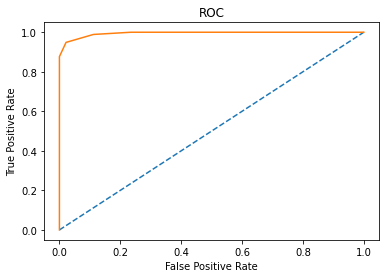

In [205]:
# predict probabilities
probs = KNN_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [206]:
## Performance Matrix on test data set
Y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, Y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print('')
print(metrics.classification_report(Y_test, Y_test_predict))

0.8343558282208589

[[980 191]
 [ 52 244]]

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1171
           1       0.56      0.82      0.67       296

    accuracy                           0.83      1467
   macro avg       0.76      0.83      0.78      1467
weighted avg       0.87      0.83      0.84      1467



Test AUC: 0.995


Text(0.5, 1.0, 'ROC')

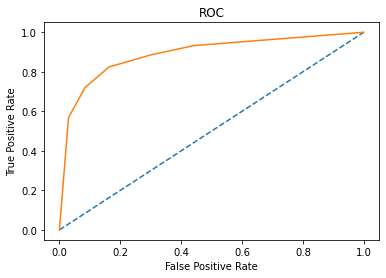

In [207]:
# predict probabilities
probs = KNN_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

**Naive Bayes using SMOTE**

In [208]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, Y_train_res)

GaussianNB()

In [209]:
## Performance Matrix on train data set with SMOTE
Y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, Y_train_res)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_train_res, Y_train_predict))
print('')
print(metrics.classification_report(Y_train_res, Y_train_predict))

0.7472291741151234

[[2008  789]
 [ 625 2172]]

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      2797
           1       0.73      0.78      0.75      2797

    accuracy                           0.75      5594
   macro avg       0.75      0.75      0.75      5594
weighted avg       0.75      0.75      0.75      5594



Train AUC: 0.691


Text(0.5, 1.0, 'ROC')

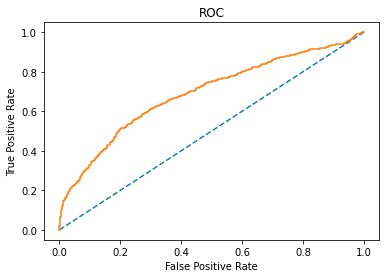

In [210]:
# predict probabilities
probs = NB_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [211]:
## Performance Matrix on test data set
Y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, Y_test)
print(model_score)
print('')
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print('')
print(metrics.classification_report(Y_test, Y_test_predict))

0.6796182685753238

[[835 336]
 [134 162]]

              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1171
           1       0.33      0.55      0.41       296

    accuracy                           0.68      1467
   macro avg       0.59      0.63      0.59      1467
weighted avg       0.75      0.68      0.71      1467



Test AUC: 0.691


Text(0.5, 1.0, 'ROC')

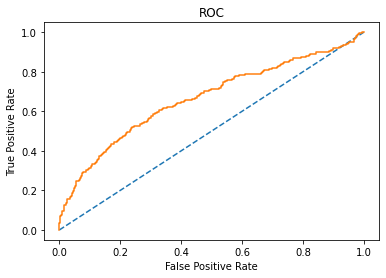

In [212]:
# predict probabilities
probs = NB_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

Cross validation for KNN SMOTE model

In [213]:
scores = cross_val_score(KNN_SM_model, X_train_res, Y_train_res, cv=10)
scores

array([0.8875    , 0.87321429, 0.9       , 0.91071429, 0.88372093,
       0.8765653 , 0.91055456, 0.9177102 , 0.89624329, 0.89266547])

In [214]:
scores = cross_val_score(KNN_SM_model, X_test, Y_test, cv=10)
scores

array([0.80272109, 0.82312925, 0.78231293, 0.78911565, 0.83673469,
       0.79591837, 0.83673469, 0.81506849, 0.82191781, 0.80136986])

**Model comparison**

In [227]:
# Performance metrics of Train data

LR_train_acc = 0.85
LR_train_auc = 0.81
LR_train_recall = 0.30
LR_train_precision = 0.69
LR_train_f1 = 0.42

LDA_train_acc = 0.84
LDA_train_auc = 0.81
LDA_train_recall = 0.30
LDA_train_precision = 0.66
LDA_train_f1 = 0.42

KNN_train_acc = 0.92
KNN_train_auc = 0.97
KNN_train_recall = 0.62
KNN_train_precision = 0.91
KNN_train_f1 = 0.74

NB_train_acc = 0.83
NB_train_auc = 0.78
NB_train_recall = 0.45
NB_train_precision = 0.52
NB_train_f1 = 0.48

ADAboost_train_acc = 0.85
ADAboost_train_auc = 0.84
ADAboost_train_recall = 0.34
ADAboost_train_precision = 0.69
ADAboost_train_f1 = 0.46

GRADboost_train_acc = 0.89
GRADboost_train_auc = 0.91
GRADboost_train_recall = 0.47
GRADboost_train_precision = 0.83
GRADboost_train_f1 = 0.60

Bagging_train_acc = 0.99
Bagging_train_auc = 1.000
Bagging_train_recall = 0.95
Bagging_train_precision = 1.000
Bagging_train_f1 = 0.97

NBsmote_train_acc = 0.75
NBsmote_train_auc = 0.69
NBsmote_train_recall = 0.78
NBsmote_train_precision = 0.73
NBsmote_train_f1 = 0.75

KNNsmote_train_acc = 0.94
KNNsmote_train_auc = 0.99
KNNsmote_train_recall = 1.000
KNNsmote_train_precision = 0.90
KNNsmote_train_f1 = 0.95


index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']

data = pd.DataFrame({'LR Train':[LR_train_acc,LR_train_auc,LR_train_recall,LR_train_precision,LR_train_f1],
                     
        'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
                     
        'KNN Train':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
                     
        'NB Train':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
        
        'ADAboost Train':[ADAboost_train_acc,ADAboost_train_auc,ADAboost_train_recall,ADAboost_train_precision,ADAboost_train_f1],
                     
        'Bagging Train':[Bagging_train_acc,Bagging_train_auc,Bagging_train_recall,Bagging_train_precision,Bagging_train_f1],
                    
        'GRADboost Train':[GRADboost_train_acc,GRADboost_train_auc,GRADboost_train_recall,GRADboost_train_precision,GRADboost_train_f1],
                    
        'NBsmote Train':[NBsmote_train_acc,NBsmote_train_auc,NBsmote_train_recall,NBsmote_train_precision,NBsmote_train_f1],
                    
        'KNNsmote Train':[KNNsmote_train_acc,KNNsmote_train_auc,KNNsmote_train_recall,KNNsmote_train_precision,KNNsmote_train_f1],},index=index)

round(data,9)

,LR Train,LDA Train,KNN Train,NB Train,ADAboost Train,Bagging Train,GRADboost Train,NBsmote Train,KNNsmote Train
Accuracy,0.85,0.84,0.92,0.83,0.85,0.99,0.89,0.75,0.94
AUC,0.81,0.81,0.97,0.78,0.84,1.00,0.91,0.69,0.99
Recall,0.30,0.30,0.62,0.45,0.34,0.95,0.47,0.78,1.00
Precision,0.69,0.66,0.91,0.52,0.69,1.00,0.83,0.73,0.90
F1 Score,0.42,0.42,0.74,0.48,0.46,0.97,0.60,0.75,0.95


In [228]:
# Performance metrics of Test data

LR_test_acc = 0.83
LR_test_auc = 0.81
LR_test_recall = 0.26
LR_test_precision = 0.72
LR_test_f1 = 0.38

LDA_test_acc = 0.83
LDA_test_auc = 0.81
LDA_test_recall = 0.28
LDA_test_precision = 0.69
LDA_test_f1 = 0.40

KNN_test_acc = 0.85
KNN_test_auc = 0.97
KNN_test_recall = 0.37
KNN_test_precision = 0.77
KNN_test_f1 = 0.50

NB_test_acc = 0.82
NB_test_auc = 0.78
NB_test_recall = 0.43
NB_test_precision = 0.59
NB_test_f1 = 0.49

ADAboost_test_acc = 0.82
ADAboost_test_auc = 0.81
ADAboost_test_recall = 0.27
ADAboost_test_precision = 0.66
ADAboost_test_f1 = 0.39

GRADboost_test_acc = 0.84
GRADboost_test_auc = 0.91
GRADboost_test_recall = 0.31
GRADboost_test_precision = 0.78
GRADboost_test_f1 = 0.45

Bagging_test_acc = 0.88
Bagging_test_auc = 1.000
Bagging_test_recall = 0.42
Bagging_test_precision = 0.94
Bagging_test_f1 = 0.58

NBsmote_test_acc = 0.68
NBsmote_test_auc = 0.69
NBsmote_test_recall = 0.55
NBsmote_test_precision = 0.33
NBsmote_test_f1 = 0.41

KNNsmote_test_acc = 0.83
KNNsmote_test_auc = 0.99
KNNsmote_test_recall = 0.82
KNNsmote_test_precision = 0.56
KNNsmote_test_f1 = 0.67


index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']

data = pd.DataFrame({'LR Test':[LR_test_acc,LR_test_auc,LR_test_recall,LR_test_precision,LR_test_f1],
                     
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
                     
        'KNN Test':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
                     
        'NB Test':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
        
        'ADAboost Test':[ADAboost_test_acc,ADAboost_test_auc,ADAboost_test_recall,ADAboost_test_precision,ADAboost_test_f1],
                     
        'Bagging Test':[Bagging_test_acc,Bagging_test_auc,Bagging_test_recall,Bagging_test_precision,Bagging_test_f1],
                    
        'GRADboost Test':[GRADboost_test_acc,GRADboost_test_auc,GRADboost_test_recall,GRADboost_test_precision,GRADboost_test_f1],
                    
        'NBsmote Test':[NBsmote_test_acc,NBsmote_test_auc,NBsmote_test_recall,NBsmote_test_precision,NBsmote_test_f1],
                    
        'KNNsmote Test':[KNNsmote_test_acc,KNNsmote_test_auc,KNNsmote_test_recall,KNNsmote_test_precision,KNNsmote_test_f1],},index=index)

round(data,9)

,LR Test,LDA Test,KNN Test,NB Test,ADAboost Test,Bagging Test,GRADboost Test,NBsmote Test,KNNsmote Test
Accuracy,0.83,0.83,0.85,0.82,0.82,0.88,0.84,0.68,0.83
AUC,0.81,0.81,0.97,0.78,0.81,1.00,0.91,0.69,0.99
Recall,0.26,0.28,0.37,0.43,0.27,0.42,0.31,0.55,0.82
Precision,0.72,0.69,0.77,0.59,0.66,0.94,0.78,0.33,0.56
F1 Score,0.38,0.40,0.50,0.49,0.39,0.58,0.45,0.41,0.67


Model validation and Final interpretaion/Recommendations 

Please find the answers in Business report.

# <h1><center> THE END </center></h1>
